# SC1015 Mini Project 


Ong Yu Jing <br>
Kynan Lau Zhe Rui <br>
Yap Xin-Yi

## Content

--------

1. Data Cleaning <br>
2. Visualisation and Exploratory Data Analysis (EDA) <br>
3. Linear Regression <br>
4. Random Forest Classifier <br>
5. Logistic Regression <br>
6. Findings and Conclusion

## Objective 

------------

Using a dataset on company reviews from Kaggle https://www.kaggle.com/datasets/davidgauthier/glassdoor-job-reviews, we have selected a company and will use EDA and Machine Learning to find out which aspect of working there has the most impact on its overall rating. 

## 1. Data Cleaning

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime
sb.set() 

In [3]:
#import Kaggle dataset 
reviewData = pd.read_csv('glassdoor_reviews.csv')
reviewData.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,5/4/2015,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,11/12/2015,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,28/1/2016,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,16/4/2016,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,23/4/2016,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [4]:
#select one firm's data - we chose ALDI.
aldidata = reviewData[reviewData['firm'] == 'ALDI']
aldidata.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
177,ALDI,26/8/2008,Area Manager,Current Employee,"Portland, OR",2,3.0,NaN,NaN,2.0,4.0,3.0,x,o,o,"""Beware all that glistens ...""","Experience, responsibility and the pay.",Extremely long hours for the sector (70+ not u...
178,ALDI,29/10/2012,Store Assistant,"Former Employee, less than 1 year","Stoke-on-Trent, England, England",1,1.0,1.0,NaN,4.0,4.0,1.0,x,r,r,Poor management and no respect,Good rate of pay (if you stick around). chance...,Extremely hard work with sometimes far from re...
179,ALDI,9/2/2013,Store Manager,"Current Employee, more than 10 years","Neston, North West England, England, England",3,2.0,2.0,NaN,2.0,4.0,2.0,x,r,r,Great Expectations.......,"Great salary for sector, very challenging and ...","Long and often unpredictable hours, sometimes ..."
180,ALDI,5/4/2013,Assistant Manager,"Former Employee, more than 3 years","Liverpool, England, England",4,3.0,3.0,NaN,4.0,4.0,4.0,v,v,v,"fast paced, hard work - good pay","Good rate of pay, holidays,",Long hours that come with retail
181,ALDI,28/4/2013,Deputy Manager,"Current Employee, less than 1 year","Brighton, England, England",5,3.0,5.0,NaN,5.0,5.0,5.0,v,v,v,"Love the job, love the salary, NEVER a boring ...","Fast paced, massive career opportunities, grea...","I haven't got a single 'con' to write, the com..."


In [5]:
aldidata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 177 to 1107
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   firm                 931 non-null    object 
 1   date_review          931 non-null    object 
 2   job_title            931 non-null    object 
 3   current              931 non-null    object 
 4   location             931 non-null    object 
 5   overall_rating       931 non-null    int64  
 6   work_life_balance    797 non-null    float64
 7   culture_values       795 non-null    float64
 8   diversity_inclusion  254 non-null    float64
 9   career_opp           802 non-null    float64
 10  comp_benefits        798 non-null    float64
 11  senior_mgmt          795 non-null    float64
 12  recommend            931 non-null    object 
 13  ceo_approv           931 non-null    object 
 14  outlook              931 non-null    object 
 15  headline             931 non-null    

### Why did we choose ALDI?

Well, here in Singapore, working in a supermarket is often a job that constitute of many part-timers. Considering the UK culture being similar to Singapore, we wanted to see what is the job satisfaction like over there.

In [6]:
#we are removing columns that do not provide useful information or are subjective in nature to analysis
aldidata = aldidata.drop(['headline', 'pros', 'cons', 'diversity_inclusion'], axis = 1)

In [7]:
aldidata.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook
177,ALDI,26/8/2008,Area Manager,Current Employee,"Portland, OR",2,3.0,NaN,2.0,4.0,3.0,x,o,o
178,ALDI,29/10/2012,Store Assistant,"Former Employee, less than 1 year","Stoke-on-Trent, England, England",1,1.0,1.0,4.0,4.0,1.0,x,r,r
179,ALDI,9/2/2013,Store Manager,"Current Employee, more than 10 years","Neston, North West England, England, England",3,2.0,2.0,2.0,4.0,2.0,x,r,r
180,ALDI,5/4/2013,Assistant Manager,"Former Employee, more than 3 years","Liverpool, England, England",4,3.0,3.0,4.0,4.0,4.0,v,v,v
181,ALDI,28/4/2013,Deputy Manager,"Current Employee, less than 1 year","Brighton, England, England",5,3.0,5.0,5.0,5.0,5.0,v,v,v


## 2. Visualisation and Exploratory Data Analysis (EDA)

In [8]:
# we compare overall_rating to different metrics to find out which has the most impact on rating 
# we create a dataframe for ratings and another one for the metrics that will be used 

rating_df = pd.DataFrame(aldidata['overall_rating'])
metrics_df = pd.DataFrame(aldidata[['work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt']])
wlb_df = pd.DataFrame(aldidata[['work_life_balance']])

# replace any null values with 0
rating_df = rating_df.fillna(0)
metrics_df = metrics_df.fillna(0)


<AxesSubplot:xlabel='senior_mgmt', ylabel='Count'>

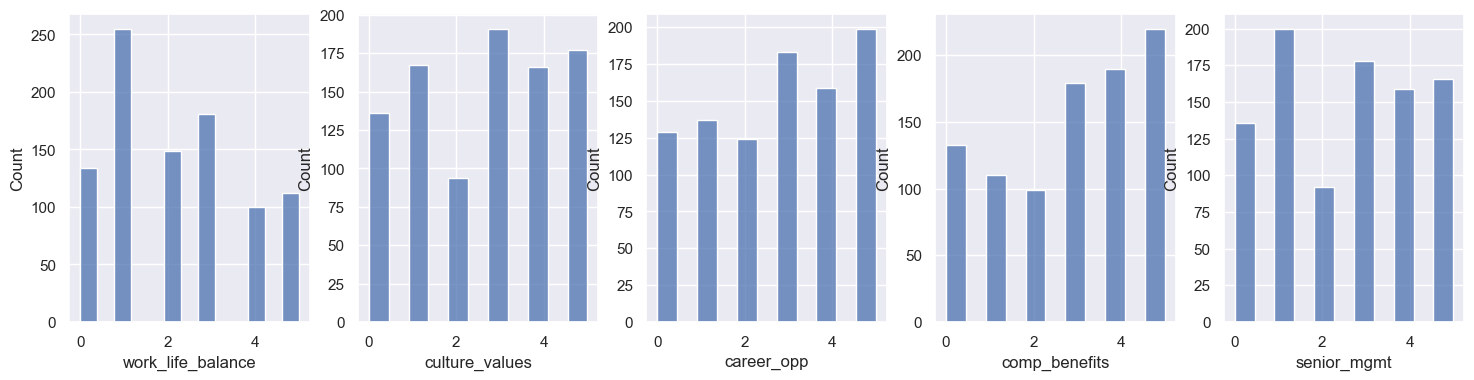

In [9]:
# frequency of each rating corresponding to each metric 
f, axes = plt.subplots(1, 5, figsize=(18, 4))
sb.histplot(data = metrics_df['work_life_balance'], ax = axes[0])
sb.histplot(data = metrics_df['culture_values'], ax = axes[1])
sb.histplot(data = metrics_df['career_opp'], ax = axes[2])
sb.histplot(data = metrics_df['comp_benefits'], ax = axes[3])
sb.histplot(data = metrics_df['senior_mgmt'], ax = axes[4])

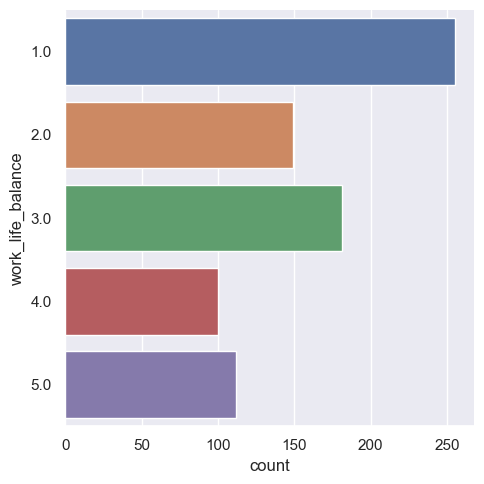

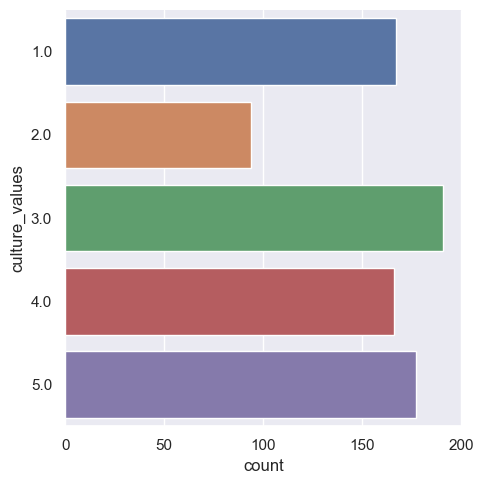

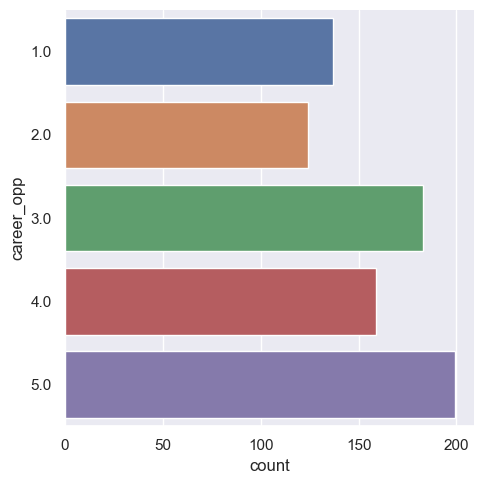

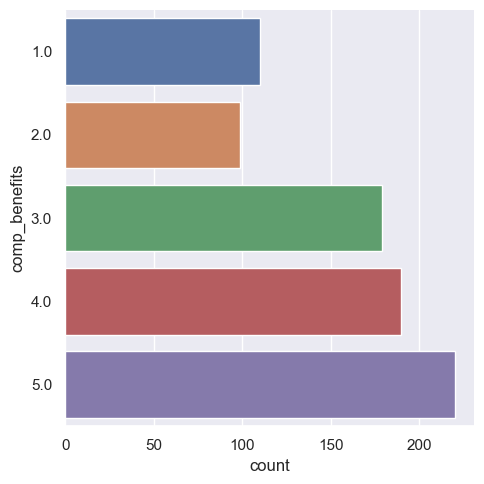

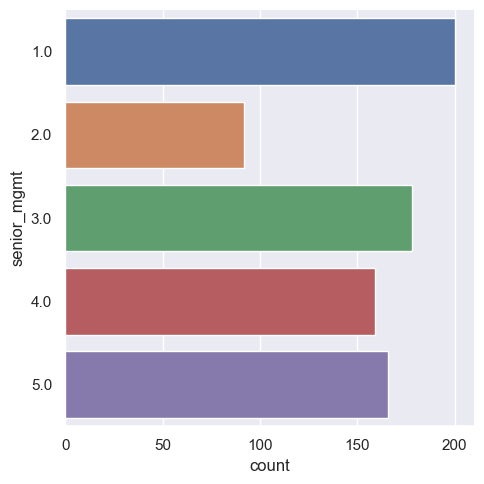

In [10]:
# let's do one for catplot to visualise data in a different way
sb.catplot(y = 'work_life_balance', data = aldidata, kind = "count")
sb.catplot(y = 'culture_values', data = aldidata, kind = "count")
sb.catplot(y = 'career_opp', data = aldidata, kind = "count")
sb.catplot(y = 'comp_benefits', data = aldidata, kind = "count")
sb.catplot(y = 'senior_mgmt', data = aldidata, kind = "count")

-------
Take note of how 1.0 rating was given over 250 times on work_life_balance. Perhaps, we can visualise its correlation later.

-----

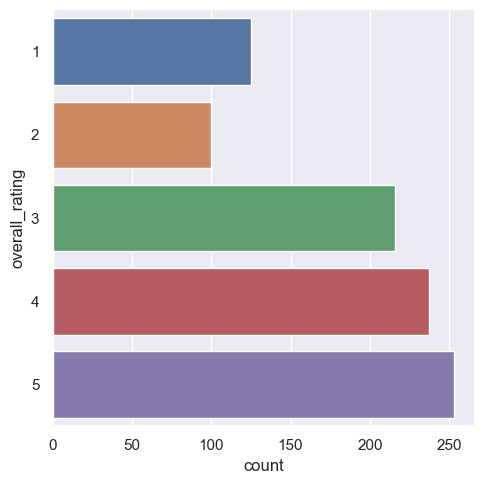

In [11]:
# one for overall rating, just to get an overall pic
sb.catplot(y = 'overall_rating', data = aldidata, kind = "count")

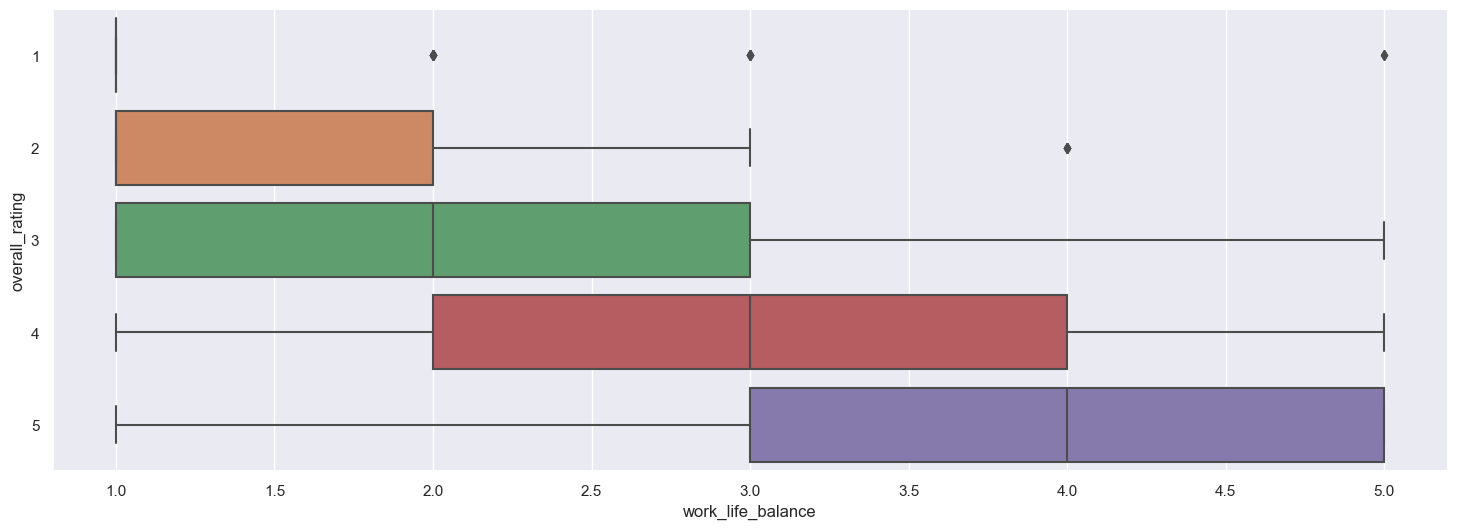

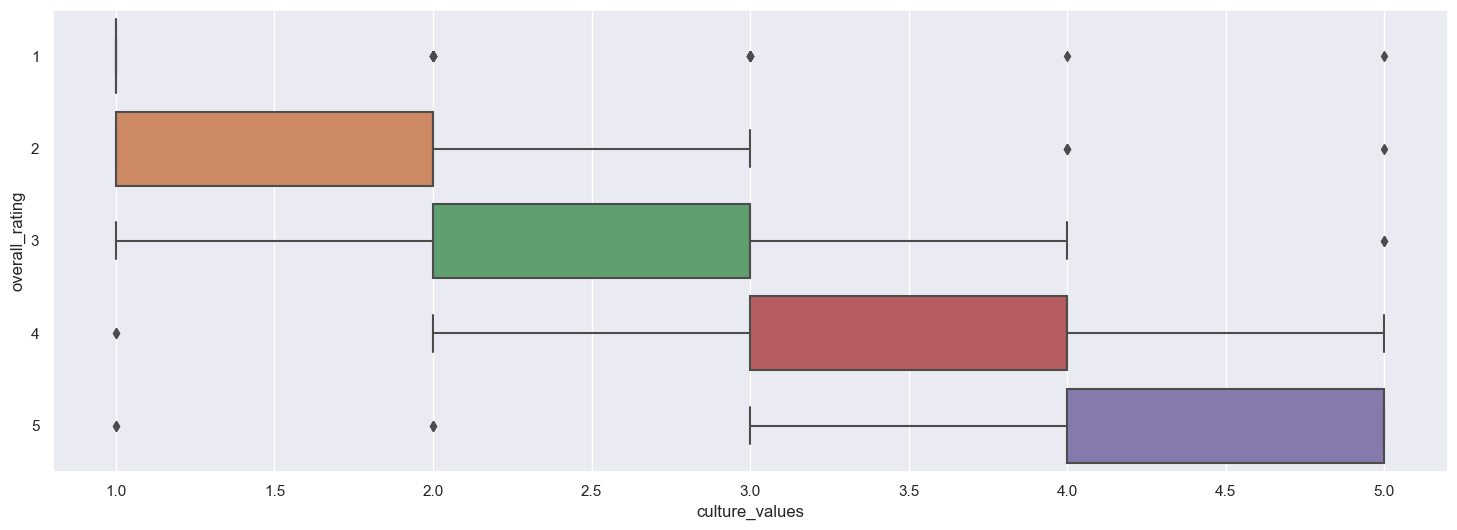

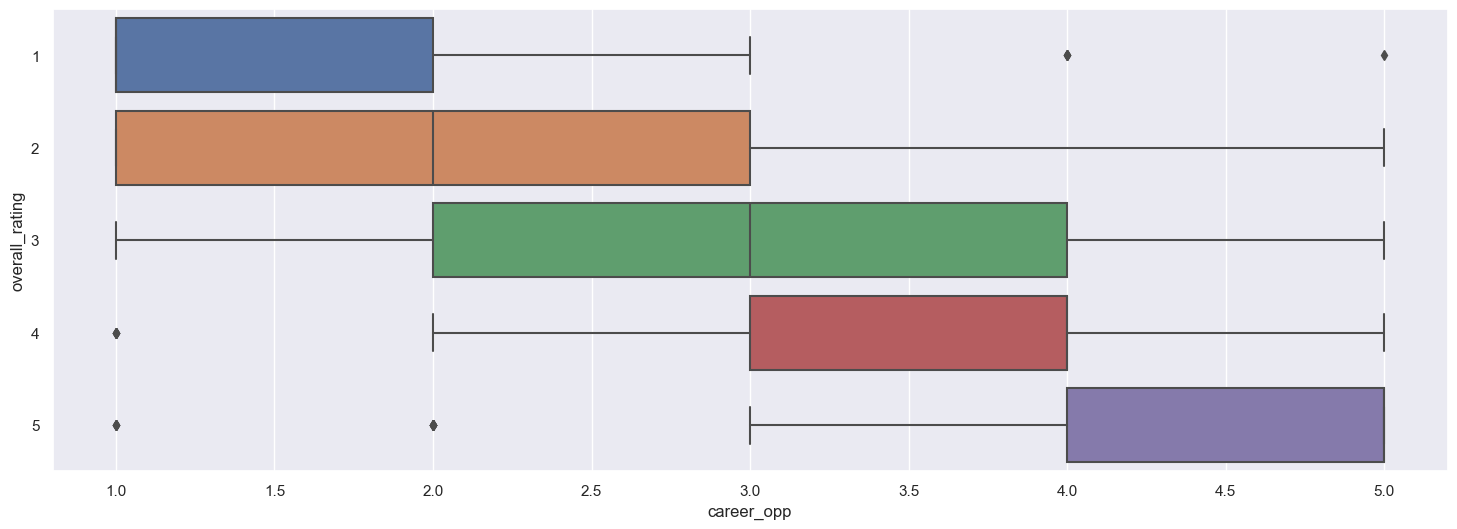

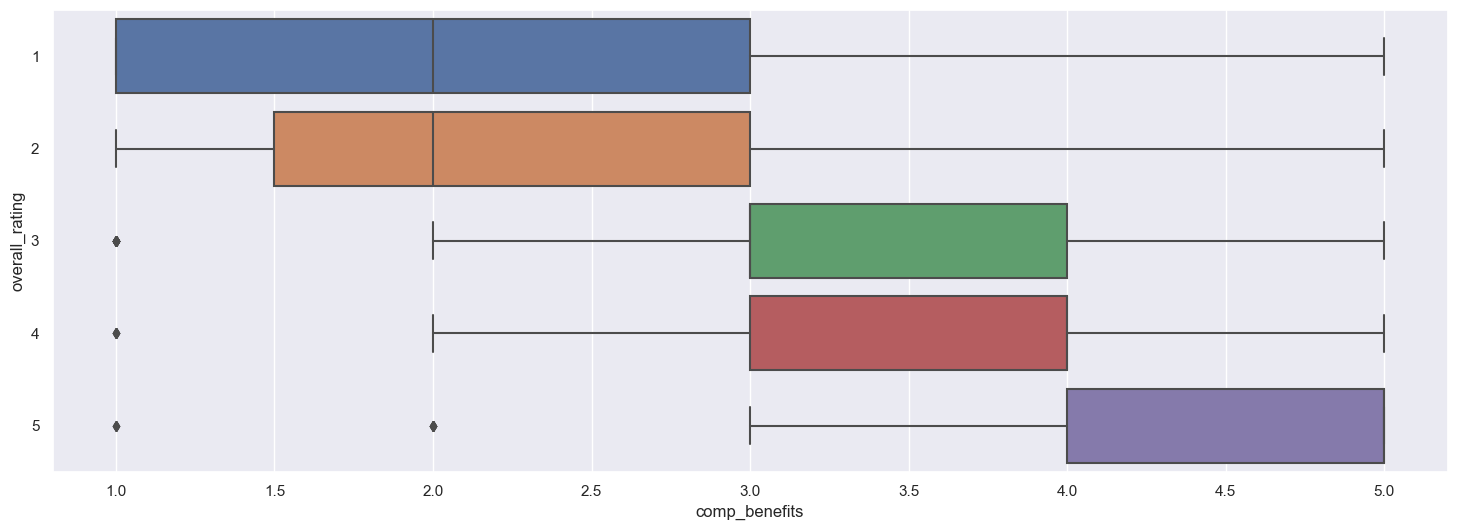

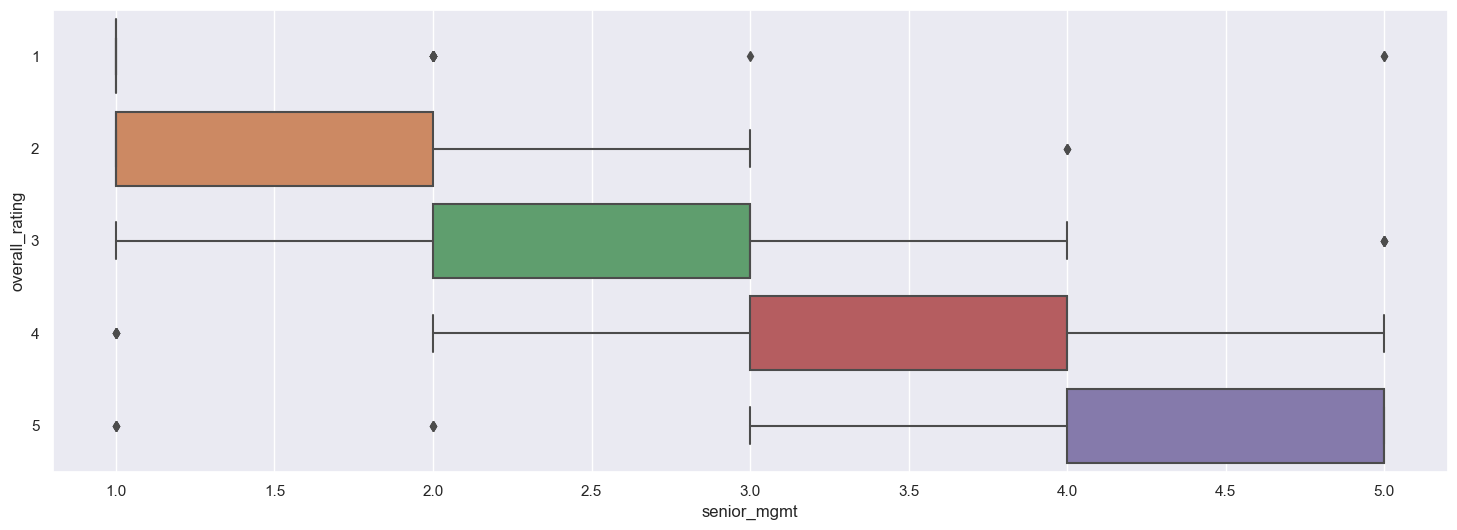

In [12]:
# now we compare overall_rating against each metric individually to see how they each affect overall_rating
for var in metrics_df:
    tempdf = aldidata[[var, 'overall_rating']]
    f = plt.figure(figsize = (18,6))
    sb.boxplot(x = var, y = "overall_rating", data = tempdf, orient = "h")

In [108]:
# Let's see it against time
yearlydata = pd.DataFrame(aldidata[['overall_rating', 'work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt', 'date_review']])

import warnings
warnings.simplefilter("ignore")

# convert date column to datetime format
yearlydata['date_review'] = pd.to_datetime(yearlydata['date_review'])

# extract year from date column
yearlydata['date_review'] = yearlydata['date_review'].dt.year

#remove some null values
yearlydata.fillna(0)

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,date_review
177,2,3.0,0.0,2.0,4.0,3.0,2008
178,1,1.0,1.0,4.0,4.0,1.0,2012
179,3,2.0,2.0,2.0,4.0,2.0,2013
180,4,3.0,3.0,4.0,4.0,4.0,2013
181,5,3.0,5.0,5.0,5.0,5.0,2013
...,...,...,...,...,...,...,...
1103,2,1.0,2.0,1.0,1.0,1.0,2021
1104,5,5.0,5.0,5.0,5.0,5.0,2021
1105,5,2.0,5.0,5.0,5.0,5.0,2021
1106,3,3.0,3.0,3.0,2.0,3.0,2021


In [14]:
yearlydata["date_review"].value_counts()

2020    254
2021    254
2019    141
2017     81
2016     77
2018     71
2015     27
2014     18
2013      6
2008      1
2012      1
Name: date_review, dtype: int64

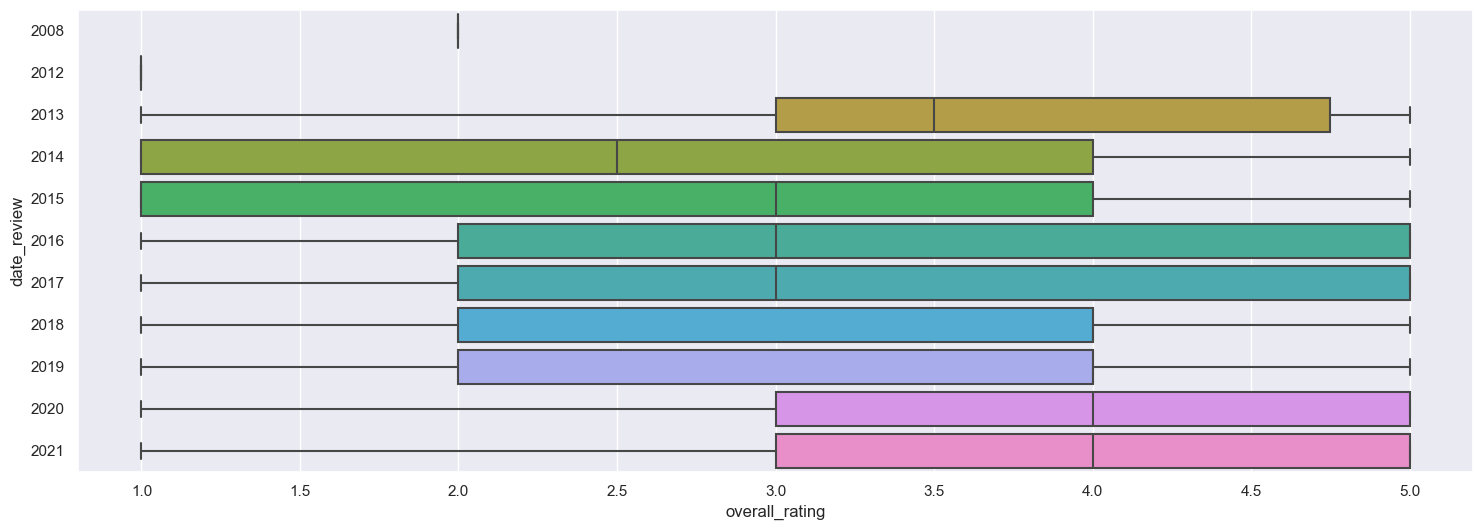

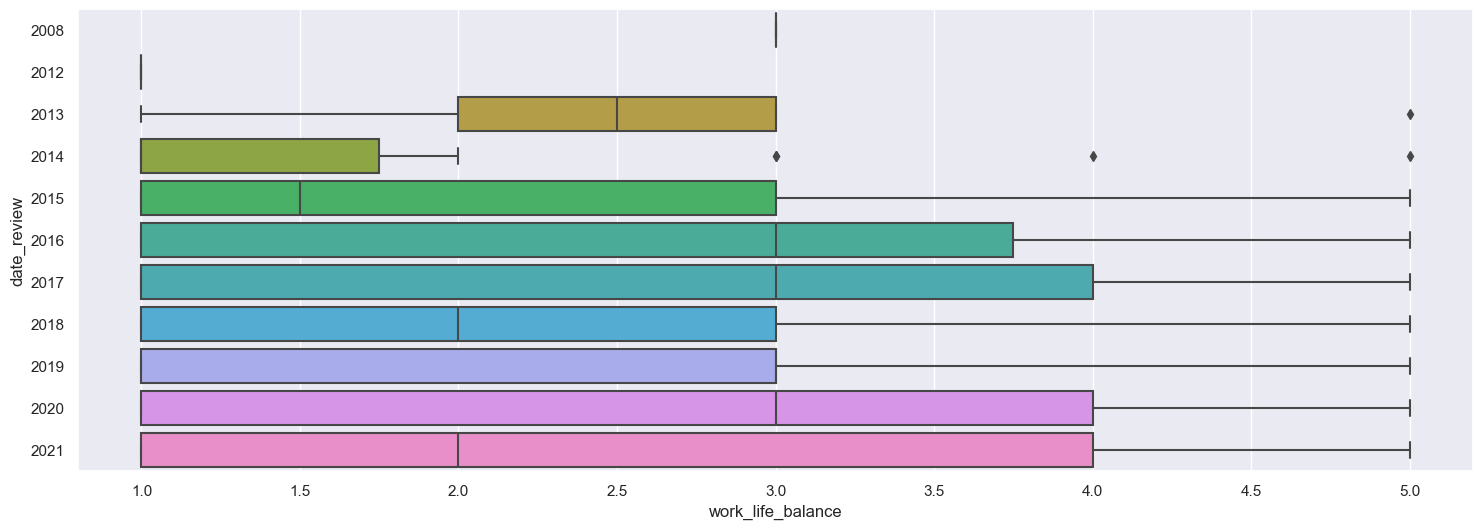

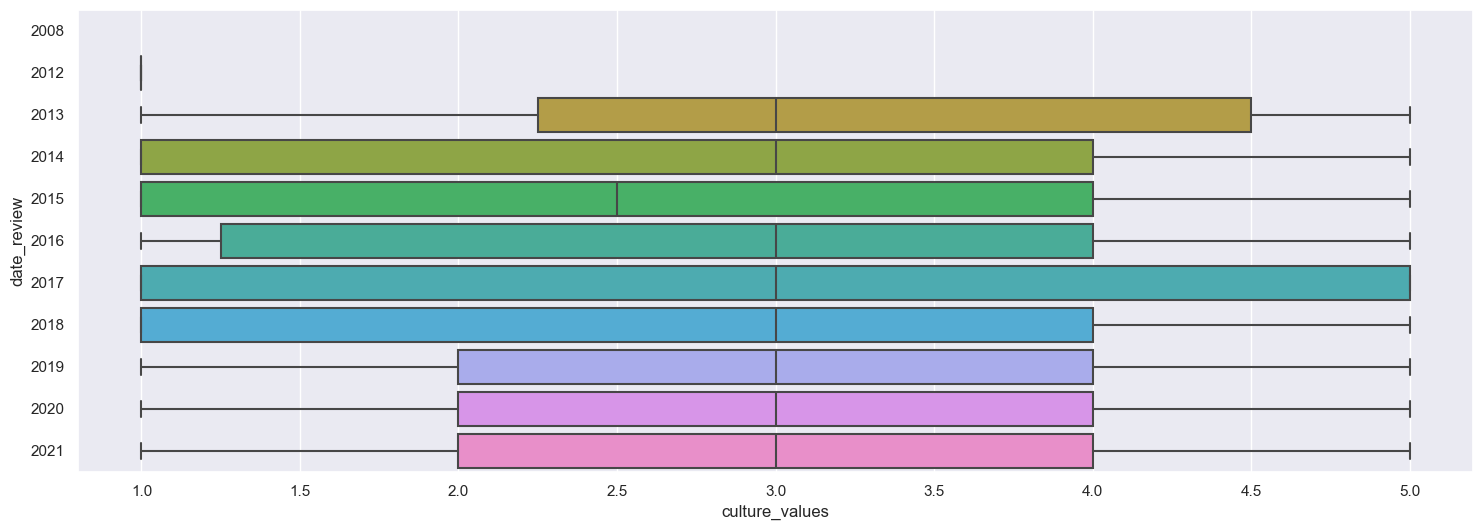

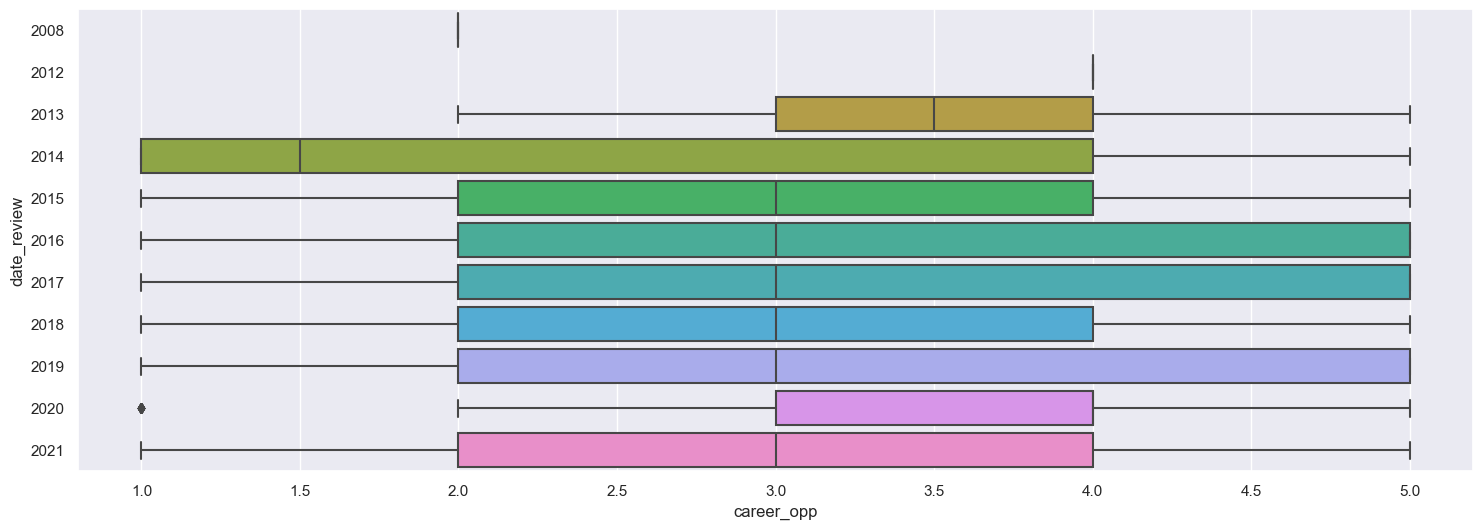

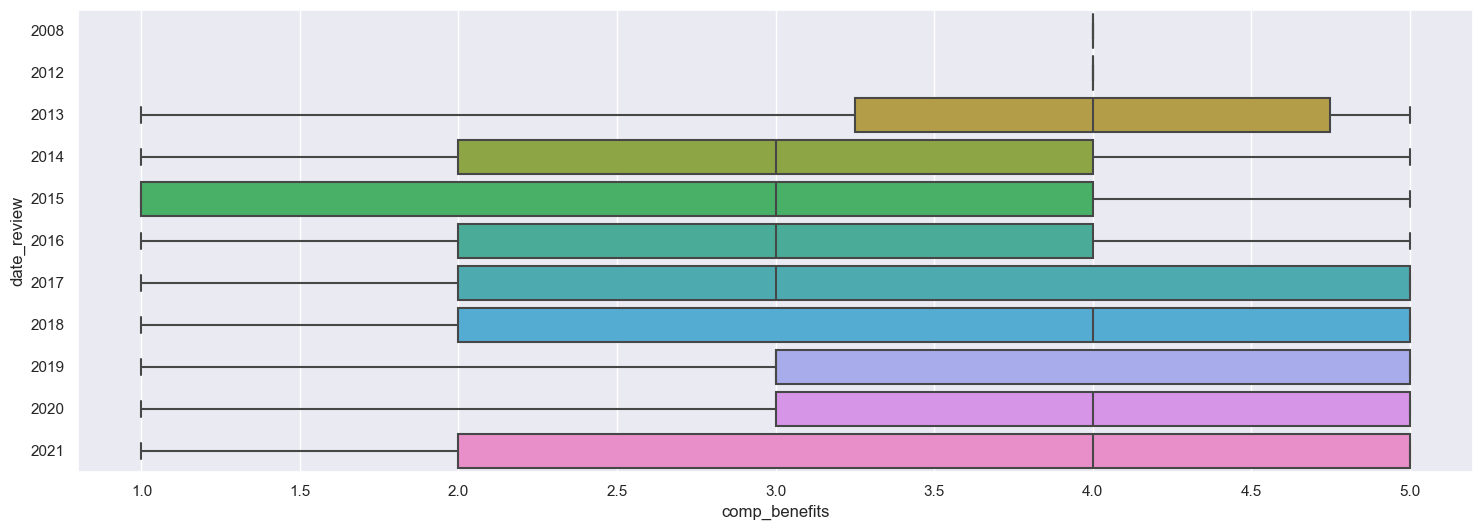

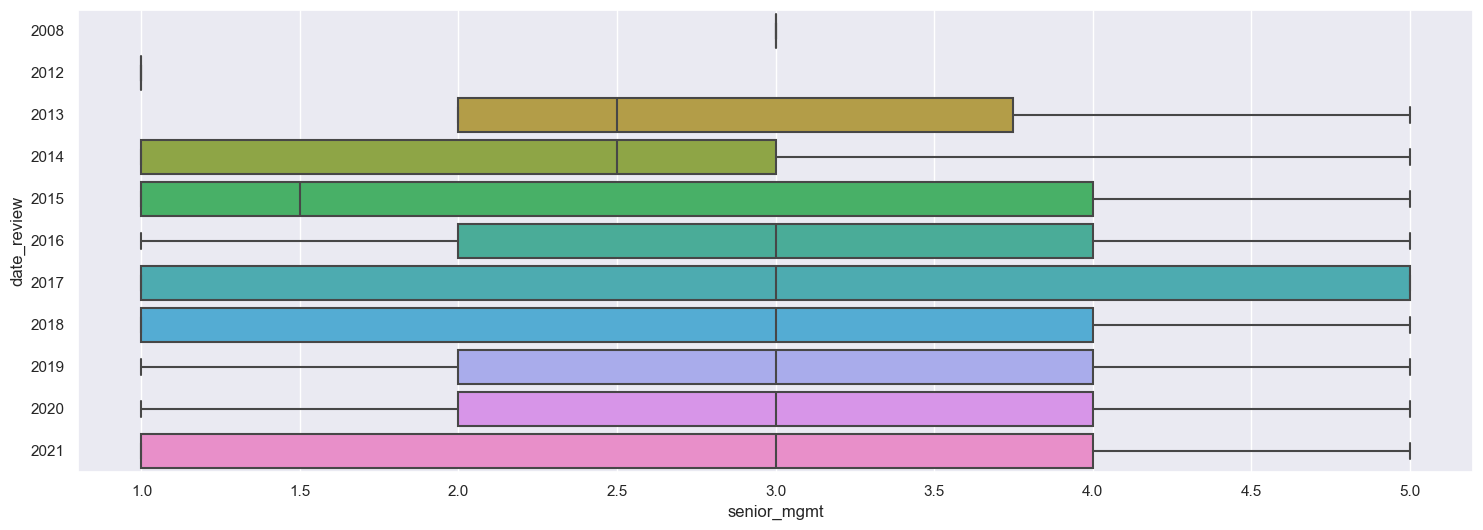

<Figure size 1800x600 with 0 Axes>

In [15]:
#See frequency against time
try:
    for var in yearlydata:
        tempdf2 = yearlydata[[var, 'date_review']]
        f = plt.figure(figsize = (18,6))
        sb.boxplot(x = var, y = "date_review", data = tempdf2, orient = "h")
        
except ValueError:
    pass


-------------
<u>Results from this:</u>

There is not enough sample size to accurately judge 2008 and 2012.<br>

Through the years, *work_life_balance* has been consistently the **worst**.<br>
The metrics: (*culture_values*, *career_opp*, *senior_mgmt*) has been average and stagnant.<br>
**However, *comp_benefits* has been on the rise.**<br>

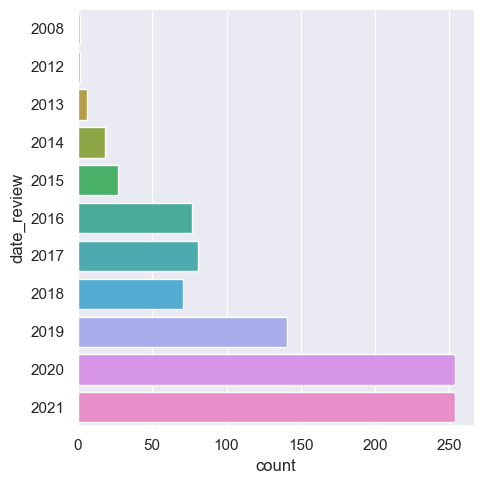

In [16]:
sb.catplot(y = "date_review", data = yearlydata, kind = "count")

In [17]:
yearlydata["overall_rating"].describe()

count    931.000000
mean       3.422127
std        1.345284
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: overall_rating, dtype: float64

---------
<u>From the catplot (numerical variables against time):</u><br>
Overall_rating slightly dipped from 2014 to 2019, but returned to a very high rating from 2019 onwards.

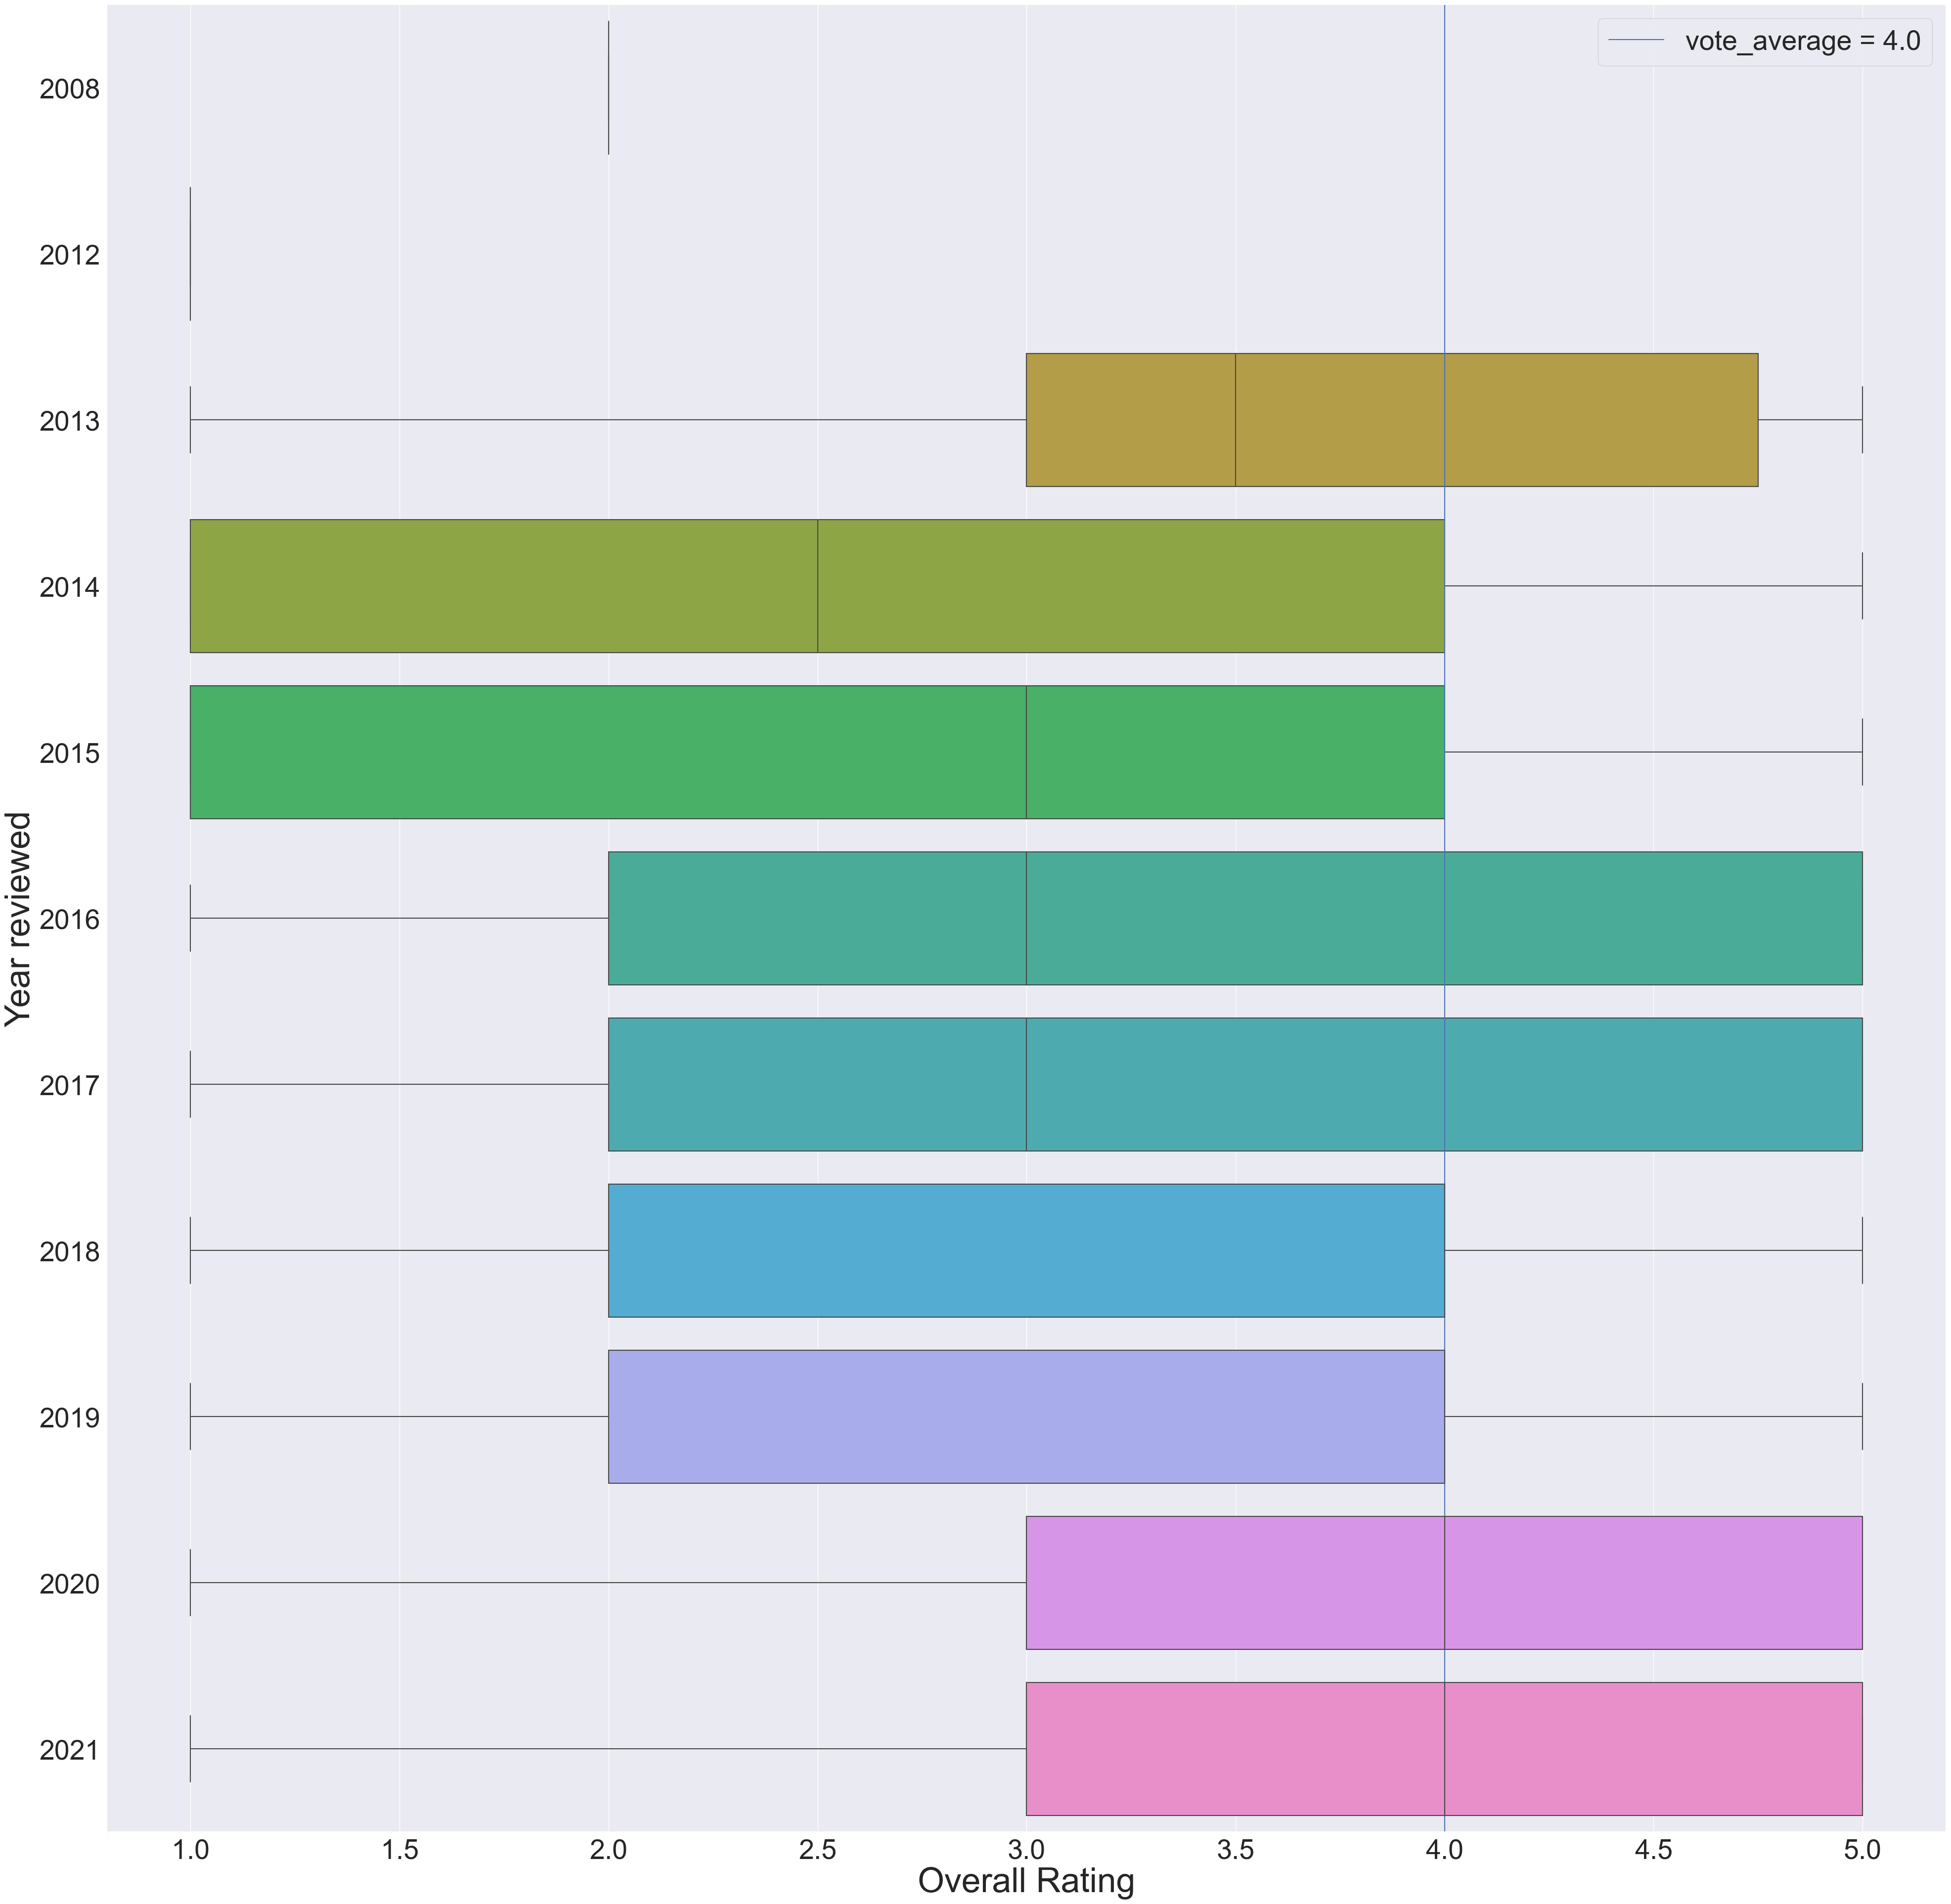

In [18]:
# Let's better visualise this with an average
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "overall_rating", y = "date_review", data = yearlydata, orient = "h")
ax.tick_params(axis='y', labelsize=40)
ax.tick_params(axis='x', labelsize=40)
ax.set_xlabel("Overall Rating",fontsize=50)
ax.set_ylabel("Year reviewed",fontsize=50)

# we shall put the average at 4 (as shown from the describe function above)
plt.axvline(4.0, label= "vote_average = 4.0")
plt.legend(fontsize=40)
plt.show()

## 3. Linear Regression

### Uni-variate

Response Variable : **Overall Rating**     
Predictor Feature : **Work life balance**    

> Regression Model : Overall rating = $a$ $\times$ work_life_balance + $b$  



<u>Reason for choosing work_life_balance first:</u>

Notice on the bar chart, there is a much higher count for **lowest rating given** in glassdoors for work life balance as compared to the other metrics

In [19]:
# let's choose one metric, work-life balance, to predict overall rating using linear regression 
# we make a dataframe for work-life balance 
wlb_df = pd.DataFrame(aldidata['work_life_balance'])
wlb_df = wlb_df.fillna(0)

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Train Set : (698, 1) (698, 1)
Test Set  : (233, 1) (233, 1)
Intercept of Regression 	: b =  [2.50573324]
Coefficients of Regression 	: a =  [[0.41183925]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.23250368901843244
Mean Squared Error (MSE) 	: 1.3638149394314028

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.16588990611739507
Mean Squared Error (MSE) 	: 1.5850995628153144



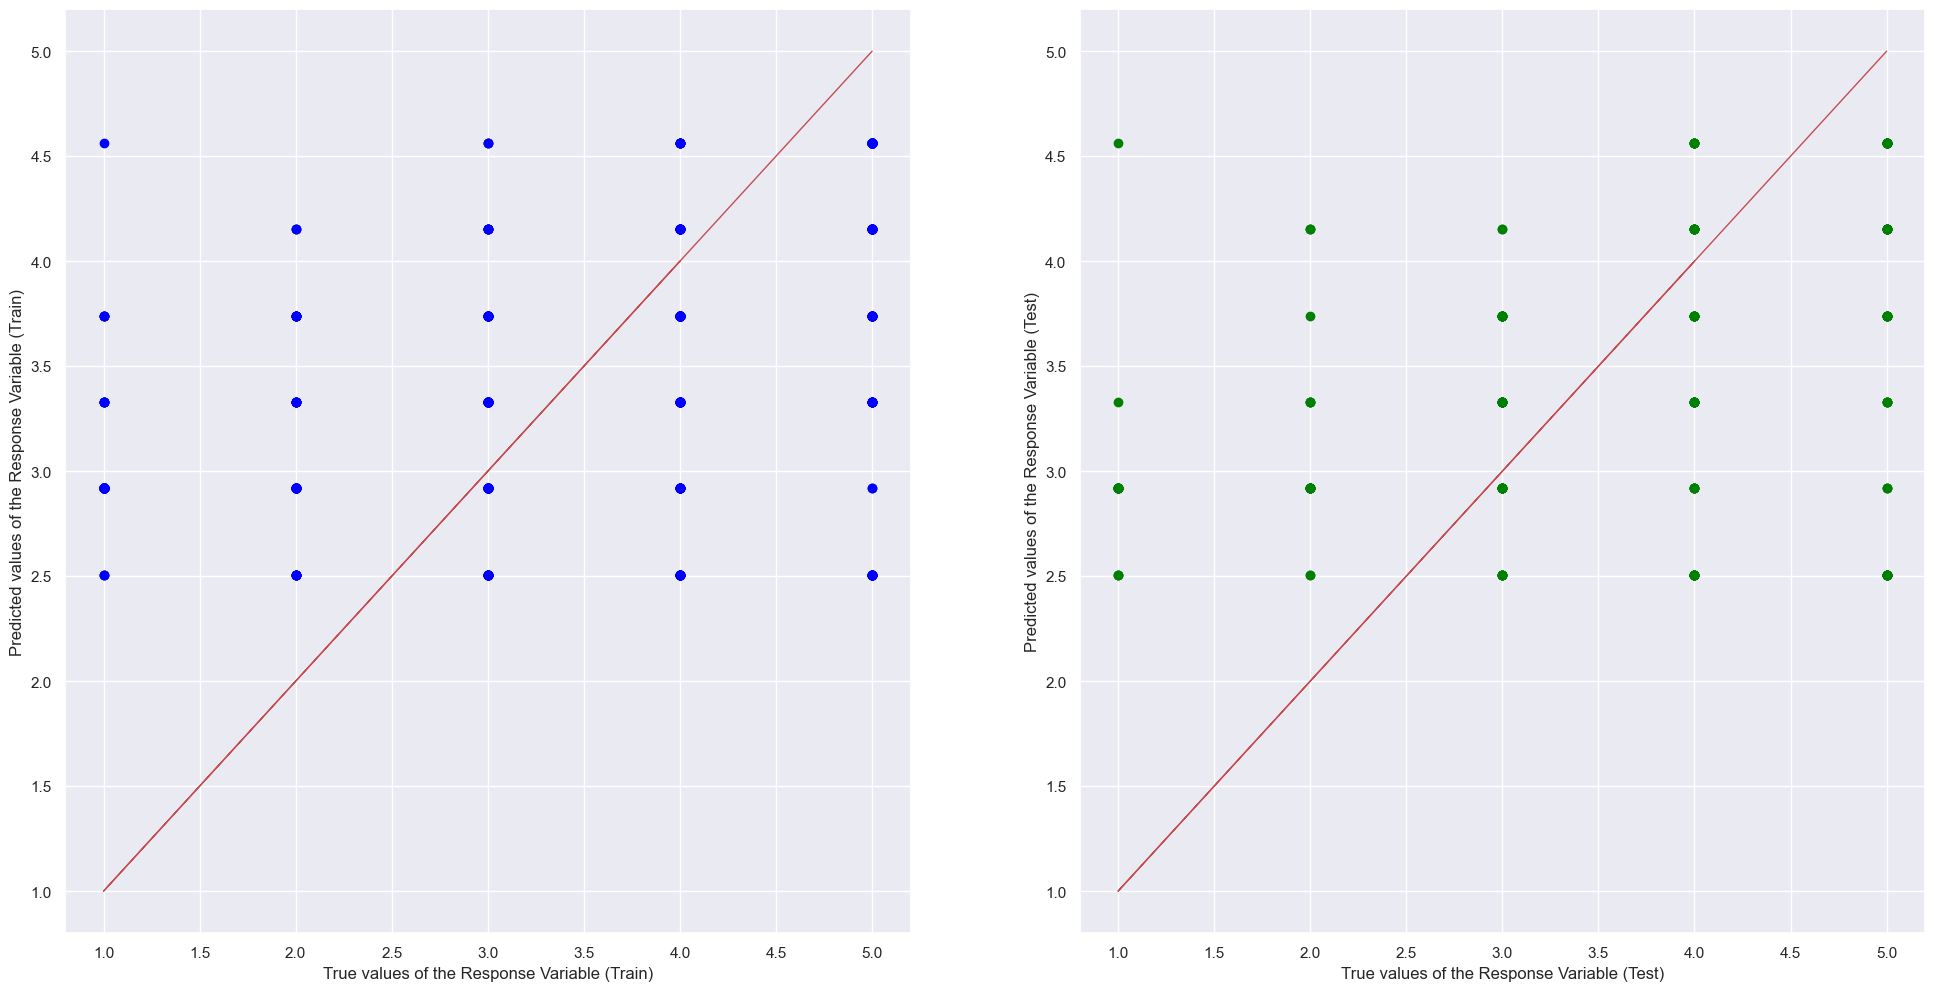

In [20]:
#Set up the regression problem with Train and Test datasets.   
#Train Set with 600 samples and Test Set with 200 samples.
# Split the Dataset into Train and Test
wlb_train, wlb_test, rating_train, rating_test = train_test_split(wlb_df, rating_df, test_size = 0.25)

# Check the sample sizes
print("Train Set :", wlb_train.shape, rating_train.shape)
print("Test Set  :", wlb_test.shape, rating_test.shape)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(wlb_train, rating_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to work_life_balance
rating_train_pred = linreg.predict(wlb_train)
rating_test_pred = linreg.predict(wlb_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(wlb_train, rating_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(rating_train, rating_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(wlb_test, rating_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(rating_test, rating_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(rating_train, rating_train_pred, color = "blue")
axes[0].plot(rating_train, rating_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(rating_test, rating_test_pred, color = "green")
axes[1].plot(rating_test, rating_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

<AxesSubplot:>

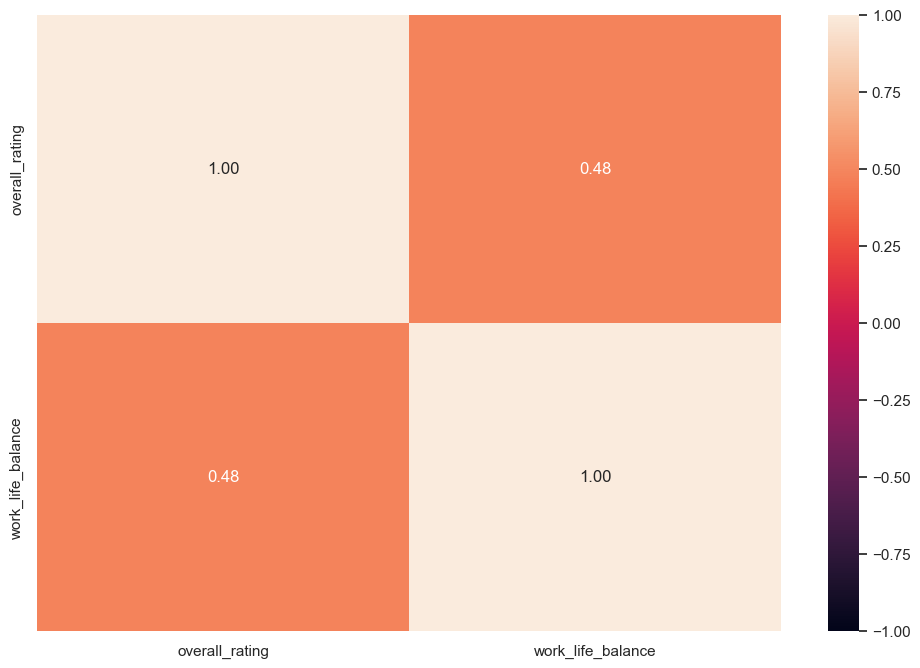

In [21]:
# Correlation between overall_rating and work-life balance
trainDF = pd.concat([rating_train, wlb_train], axis = 1).reindex(rating_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Now, let's repeat and compare overall_rating against other metrics.

-----------
### Multi-variate

Response Variable : **Overall Rating**     
Predictor Feature : **ALL the numerical metrics**    

> Regression Model : Overall rating = $a$ $\times$ metrics_df + $b$  


In [62]:
# Split the metrics data and overall_rating data into Train and Test
metrics_train, metrics_test, m_rating_train, m_rating_test = train_test_split(metrics_df, rating_df, test_size = 0.25)

# Check the sample sizes
print("Train Set :", m_rating_train.shape, metrics_train.shape)
print("Test Set  :", m_rating_test.shape, metrics_test.shape)

Train Set : (698, 1) (698, 5)
Test Set  : (233, 1) (233, 5)


<AxesSubplot:>

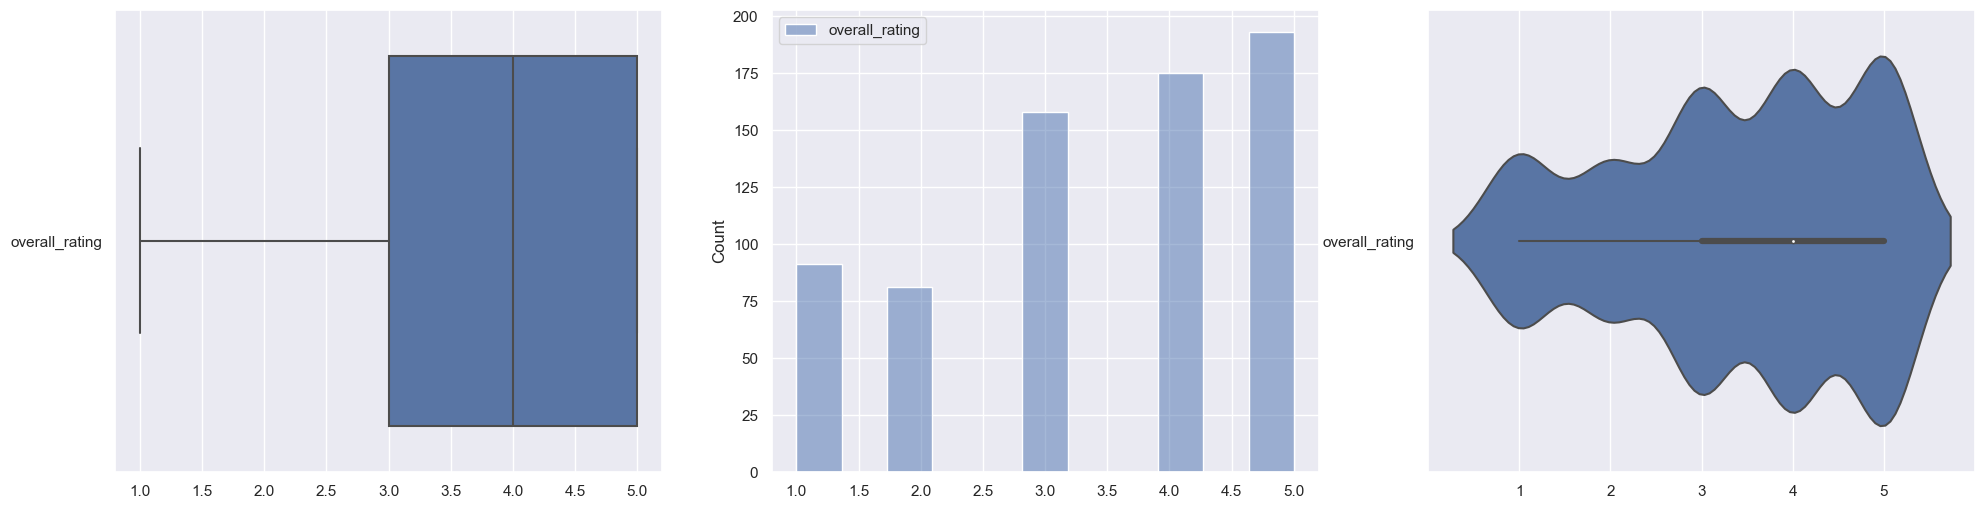

In [63]:
# Draw the distribution of overall_rating 
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = m_rating_train, orient = "h", ax = axes[0])
sb.histplot(data = m_rating_train, ax = axes[1])
sb.violinplot(data = m_rating_train, orient = "h", ax = axes[2])

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3371420855722874
Mean Squared Error (MSE) 	: 1.2010962987819431

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.319973814737764
Mean Squared Error (MSE) 	: 1.2207377537054738



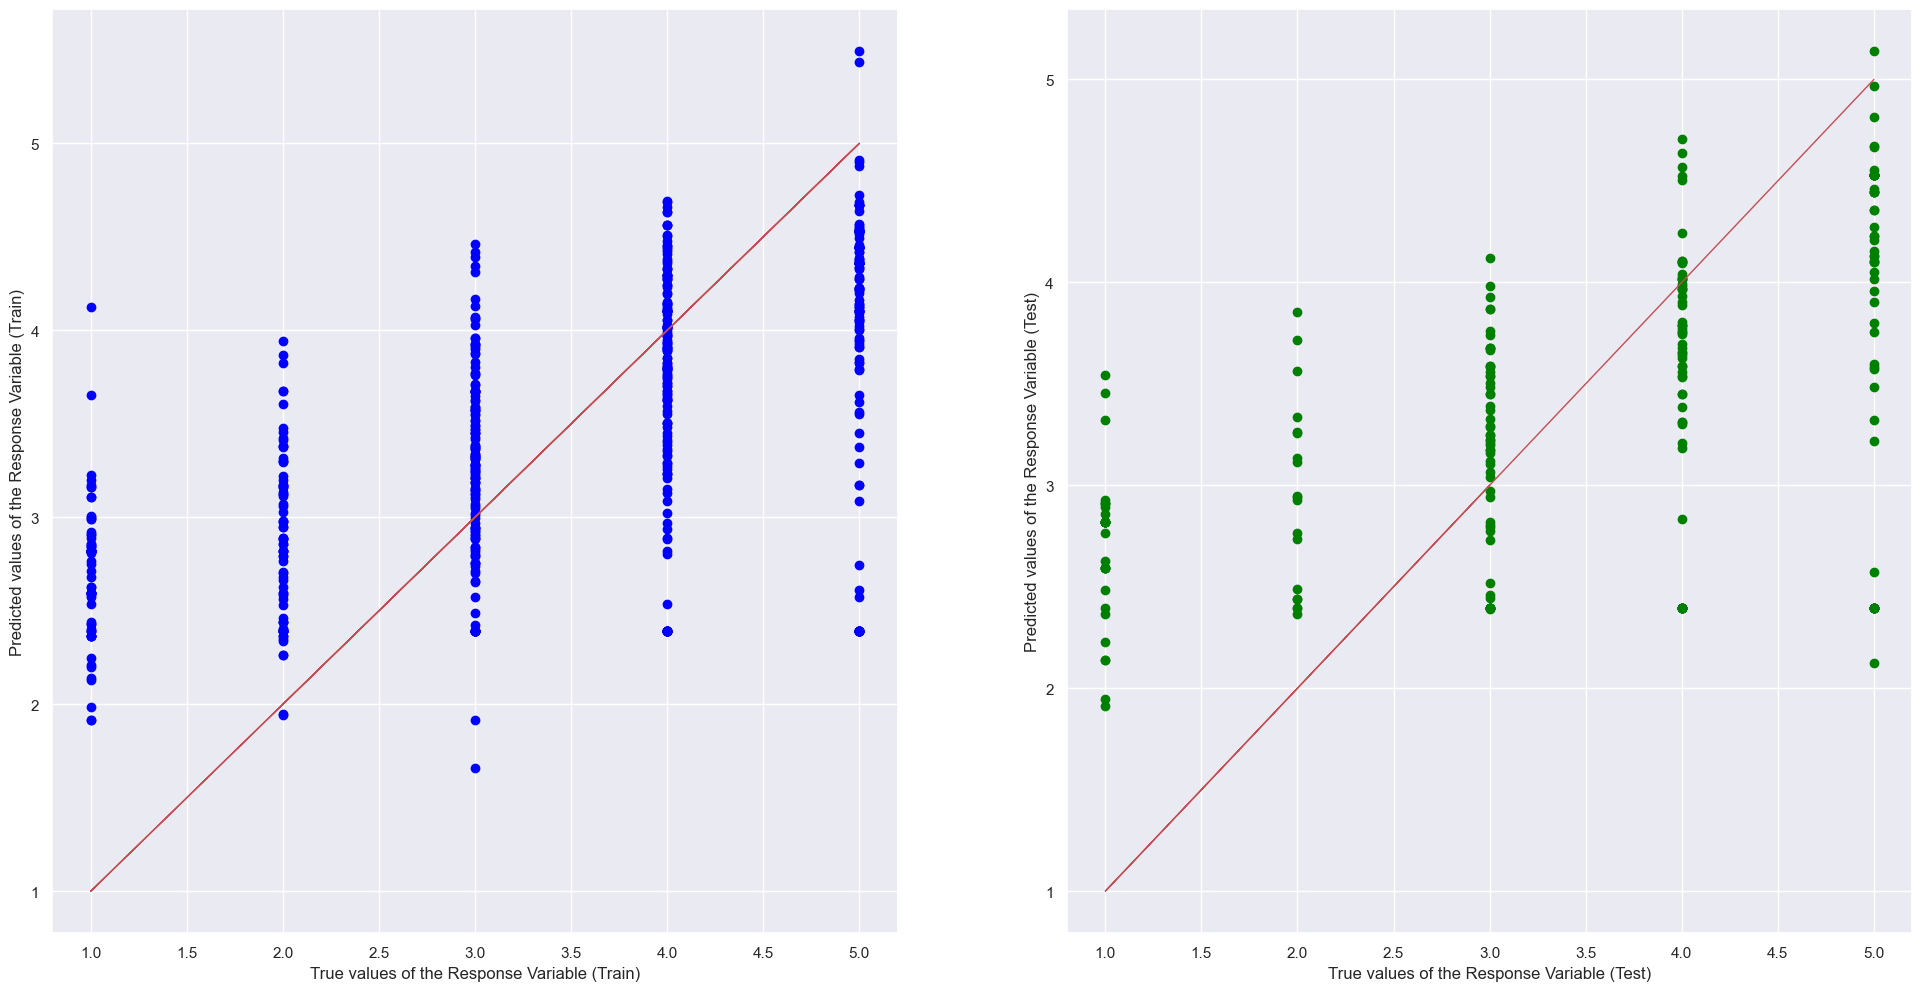

In [64]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(metrics_train, m_rating_train)        # train the linear regression model

# Predict Total values corresponding to work_life_balance
mrating_train_pred = linreg.predict(metrics_train)
mrating_test_pred = linreg.predict(metrics_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(metrics_train, m_rating_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(m_rating_train, mrating_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(metrics_test, m_rating_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(m_rating_test, mrating_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(m_rating_train, mrating_train_pred, color = "blue")
axes[0].plot(m_rating_train, m_rating_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(m_rating_test, mrating_test_pred, color = "green")
axes[1].plot(m_rating_test, m_rating_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

<AxesSubplot:>

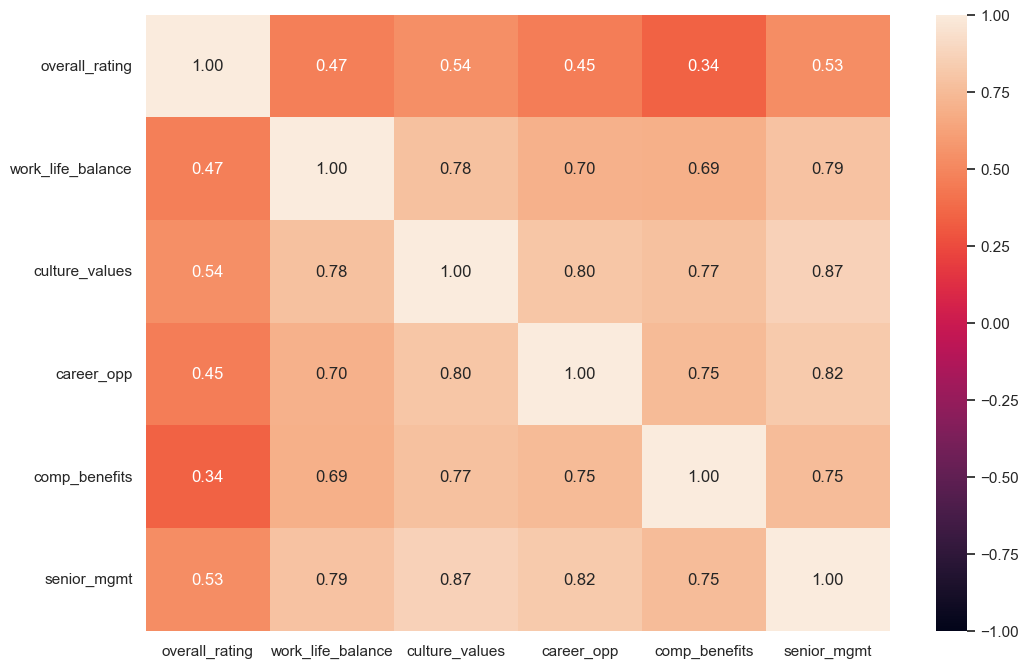

In [65]:
# Correlation between overall_rating and all the metrics
trainDF = pd.concat([m_rating_train, metrics_train], axis = 1).reindex(m_rating_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

#### <u>Conclusion from this</u>

Hence, **culture_values** has the <u>highest correlation</u> to overall_rating, compared to the other relevant metrics.

This means that when employees give their rating to the company, the likelihood of a company's culture and values being an important factor to their rating is very high. Hence, companies should care more about fostering a good environment as compared to other things. It could also be that culture and values affects the workplace environment way more than other metrics. That is not to say the other metrics are not important, but the culture and values of a company matters more.

------
### Bi-variate relationship

**Notice how senior_mgmt is very close to culture_values in terms of correlation.** We shall plot a bi-variate relationship to further examine the correlation between senior_mgmt and culture_values, seeing how their correlation with other variables are comparably much higher than the rest of the numerical metrics.

Response Variable : **Senior Management**     
Predictor Feature : **Culture values**    

> Regression Model : senior_mgmt = $a$ $\times$ culture_values + $b$  

In [26]:
# Bi-variate relationship
culture_values = pd.DataFrame(metrics_df['culture_values'])
senior_mgmt = pd.DataFrame(metrics_df['senior_mgmt'])

# Split the metrics data and overall_rating data into Train and Test
cv_train, cv_test, sm_train, sm_test = train_test_split(culture_values, senior_mgmt, test_size = 0.25)

# Check the sample sizes
print("Train Set :", cv_train.shape, sm_train.shape)
print("Test Set  :", cv_test.shape, sm_test.shape)

Train Set : (698, 1) (698, 1)
Test Set  : (233, 1) (233, 1)


Intercept of Regression 	: b =  [0.26226891]
Coefficients of Regression 	: a =  [[0.86771615]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7521592447936567
Mean Squared Error (MSE) 	: 0.743636214455998

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7205426020096992
Mean Squared Error (MSE) 	: 0.7975157890297724



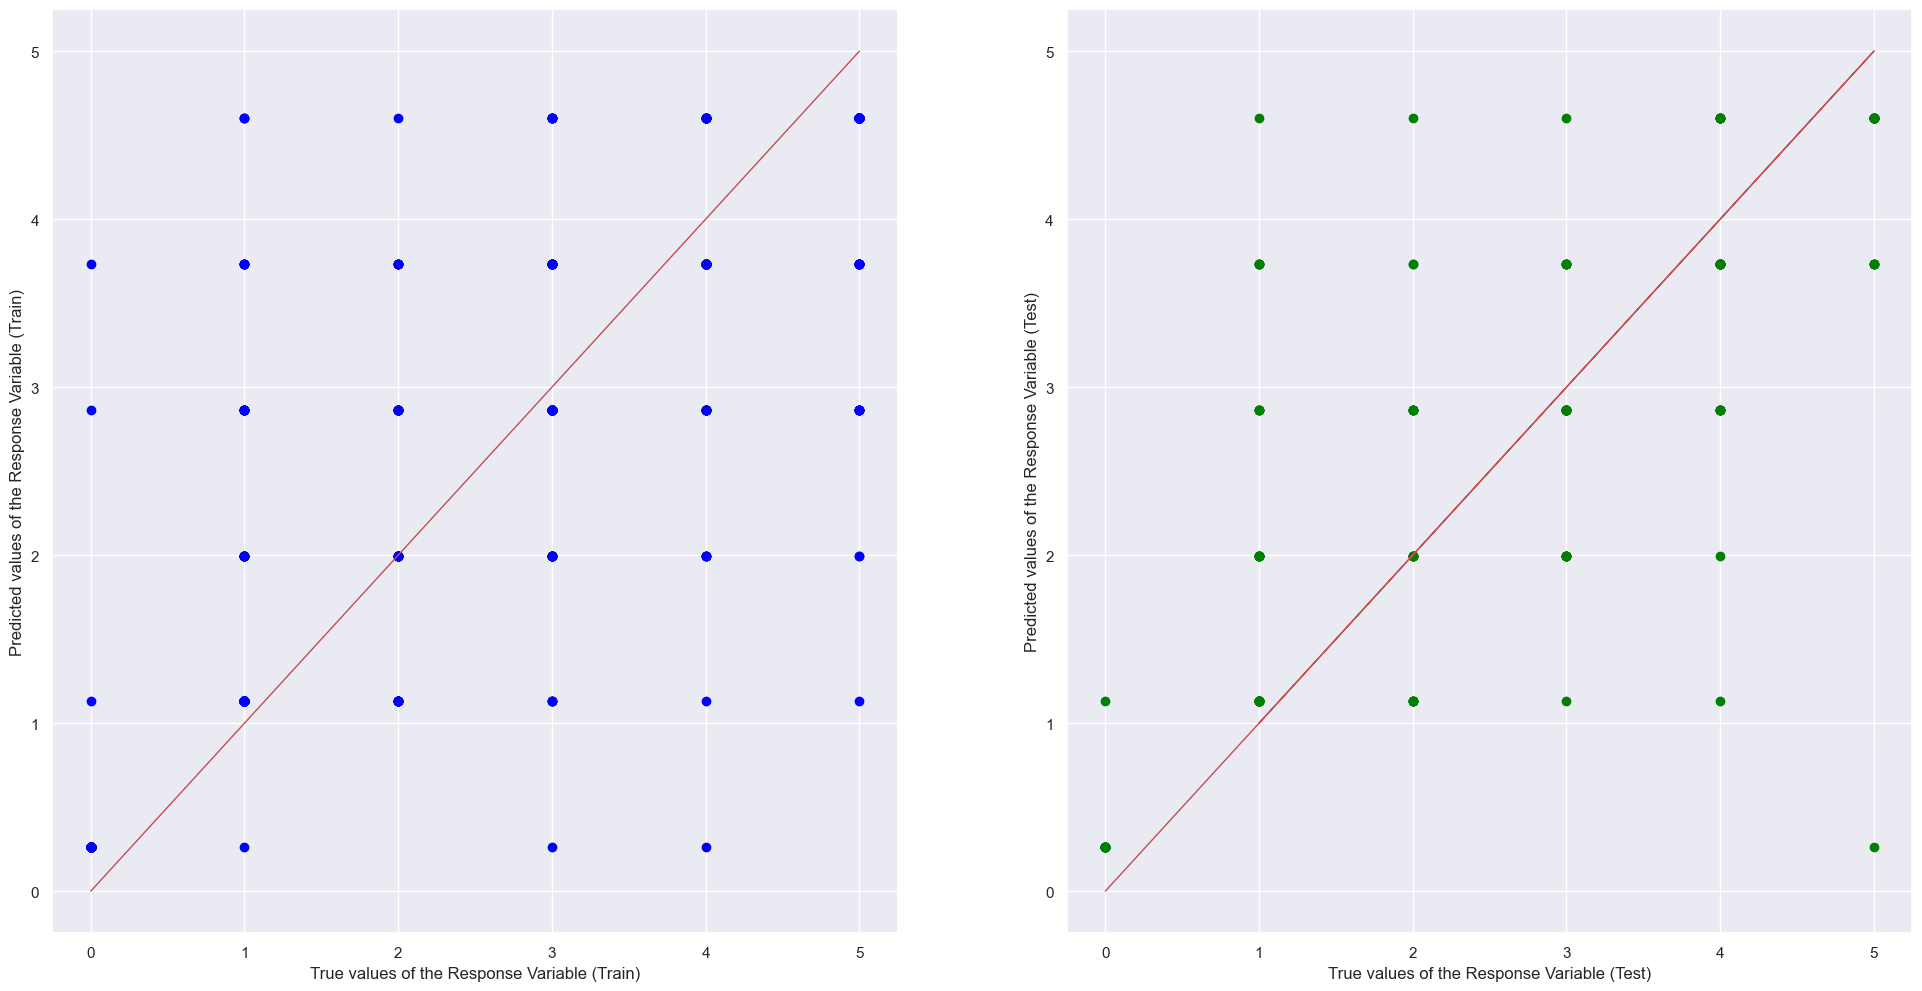

In [27]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(cv_train, sm_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to culture_values
sm_train_pred = linreg.predict(cv_train)
sm_test_pred = linreg.predict(cv_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(cv_train, sm_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(sm_train, sm_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(cv_test, sm_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(sm_test, sm_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(sm_train, sm_train_pred, color = "blue")
axes[0].plot(sm_train, sm_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(sm_test, sm_test_pred, color = "green")
axes[1].plot(sm_test, sm_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

<u>Things to note from this:</u>

There is a much higher explained variance and lower mean squared error. This means there is a much higher predictive power in this model and it has a lower margin of error. The key insight is that the company should aim to have **both** higher culture values and better senior management. This has a **higher chance of improving overall rating**, and possibly **employee retention in ALDI.**

------
### Categorical Variables

In [28]:
# using categorical data to predict overall_rating

#in this dataset, the ranking for recommendation of firm, CEO approval and
#outlook are allocated the ratings of 'v', 'r', 'x' and 'o'
#where v - Positive, r - Mild, x - Negative, o - No opinion
aldidata_cat = aldidata[['recommend', 'ceo_approv', 'outlook', 'overall_rating']]

# we are looking to remove the entries with 'no opinion'
aldidata_cat = aldidata_cat[~aldidata_cat.isin(['o']).any(axis=1)]
aldidata_cat.head()

,recommend,ceo_approv,outlook,overall_rating
178,x,r,r,1
179,x,r,r,3
180,v,v,v,4
181,v,v,v,5
182,v,v,v,5


In [29]:
# we shall use a dictionary 'letter_to_num' to convert it into numerical values
letter_to_num ={'v': 5, 'r': 2, 'x': 0}

aldidata_cat['recommend'] = aldidata_cat['recommend'].map(letter_to_num)
aldidata_cat['ceo_approv'] = aldidata_cat['ceo_approv'].map(letter_to_num)
aldidata_cat['outlook'] = aldidata_cat['outlook'].map(letter_to_num)

In [30]:
aldidata_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 178 to 1107
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   recommend       573 non-null    int64
 1   ceo_approv      573 non-null    int64
 2   outlook         573 non-null    int64
 3   overall_rating  573 non-null    int64
dtypes: int64(4)
memory usage: 22.4 KB


Intercept of Regression 	: b =  1.6811732803679764
Coefficients of Regression 	: a =  [0.14337722 0.2044029  0.22782381]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.598419905287287
Mean Squared Error (MSE) 	: 0.7513329856522648

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6733078034073866
Mean Squared Error (MSE) 	: 0.751678790105622



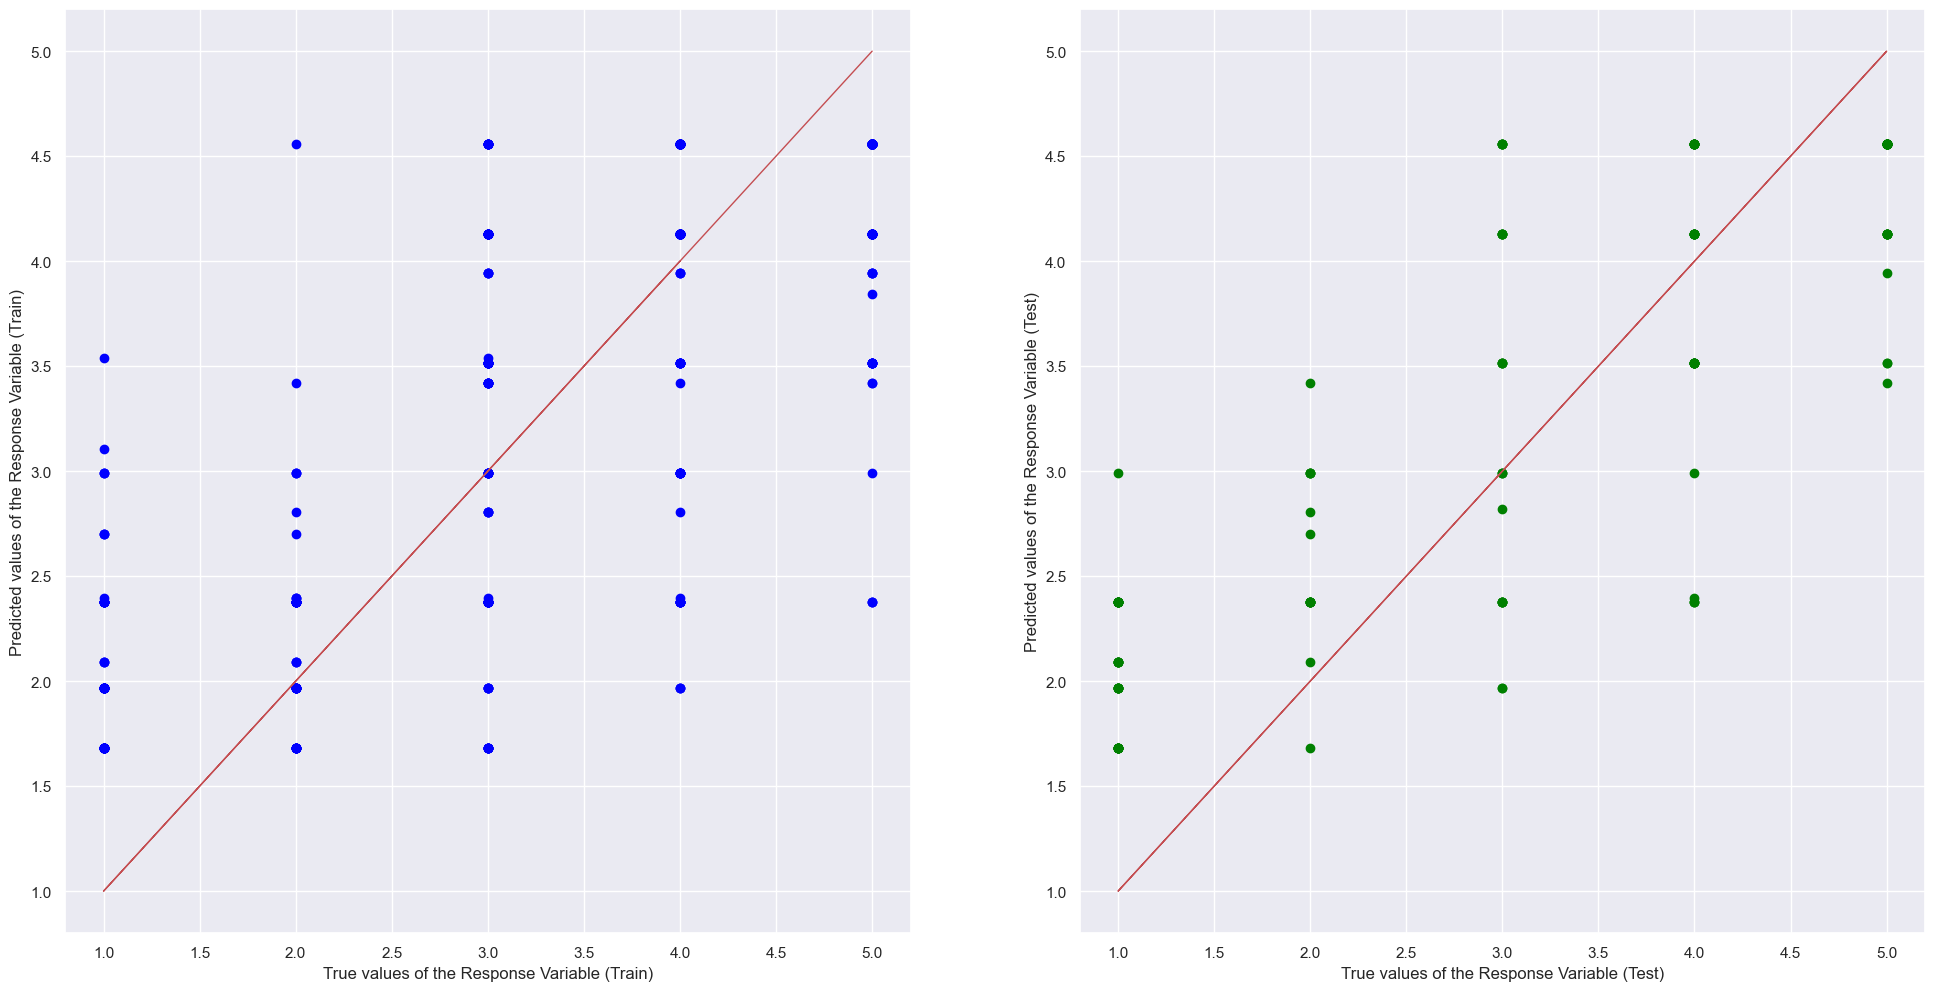

In [31]:
# Split the categorical data and overall_rating into Train and Test
cat_train, cat_test, cat_rating_train, cat_rating_test = train_test_split(aldidata_cat[aldidata_cat.columns.difference(['overall_rating'])], 
                                                                    aldidata_cat['overall_rating'], test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(cat_train, cat_rating_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
cat_rating_train_pred = linreg.predict(cat_train)
cat_rating_test_pred = linreg.predict(cat_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(cat_train, cat_rating_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(cat_rating_train, cat_rating_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(cat_test, cat_rating_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(cat_rating_test, cat_rating_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(cat_rating_train, cat_rating_train_pred, color = "blue")
axes[0].plot(cat_rating_train, cat_rating_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(cat_rating_test, cat_rating_test_pred, color = "green")
axes[1].plot(cat_rating_test, cat_rating_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

<AxesSubplot:>

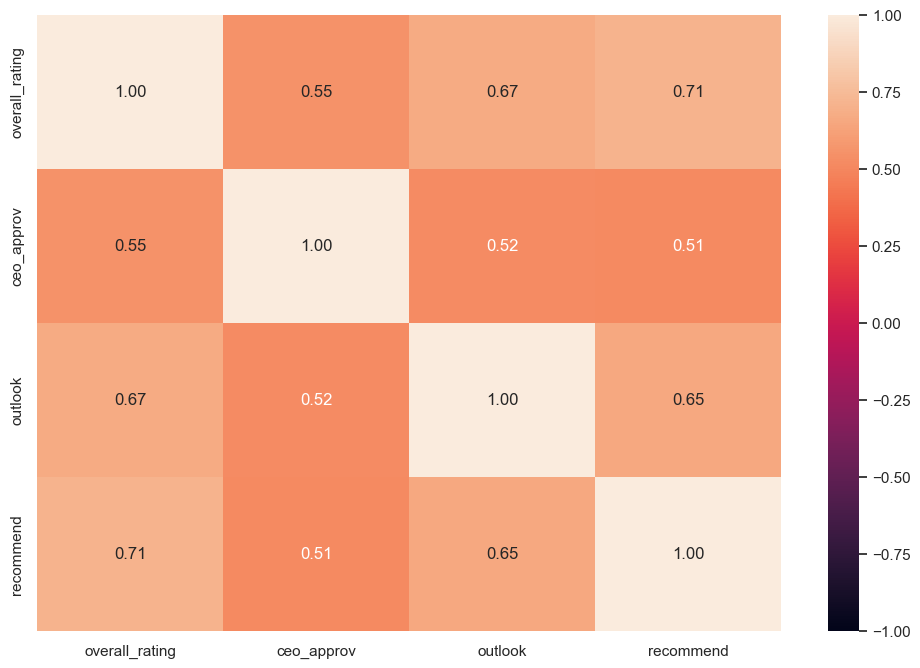

In [32]:
# Correlation between Response and the Predictors
trainDF = pd.concat([cat_rating_train, cat_train], axis = 1).reindex(cat_rating_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

This shows that recommend has the highest correlation to overall_rating.

The number given as shown from the function letter_to_num rebase the categorical ratings, such that the max rating is 5 which then is comparable to the numerical metrics. The correct number for r (Mild) should have been 2.5, but we gave it a 2 to standardise it as an integer.

This large gap in rating could keep to a larger variance, or a graph that is more skewed to the rating 5, when the reviews put positive for any of the categorical variables. This may lead to a more misleading representative of the correlation between categorical variables and overall_rating.

## 4. Random Forest Classifier

In [81]:
# we make a new dataframe to combine both rating_df and metrics_df
new_aldidata = pd.DataFrame(aldidata[['overall_rating', 'work_life_balance', 'culture_values', 'career_opp', 
                                      'comp_benefits', 'senior_mgmt']])
new_aldidata = new_aldidata.fillna(0)
new_aldidata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 177 to 1107
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   overall_rating     931 non-null    int64  
 1   work_life_balance  931 non-null    float64
 2   culture_values     931 non-null    float64
 3   career_opp         931 non-null    float64
 4   comp_benefits      931 non-null    float64
 5   senior_mgmt        931 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 50.9 KB


In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

rating_response = pd.DataFrame(new_aldidata[['overall_rating']])
metrics_predict = pd.DataFrame(new_aldidata[['work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt']])


train_metrics_predict, test_metrics_predict, train_rating_response, test_rating_response = train_test_split(metrics_predict, rating_response, test_size = 0.25, random_state = 42)

# import random forest and fit the data 
rf = RandomForestClassifier()
rf.fit(train_metrics_predict, train_rating_response)

# use the current model and the test set of predictors to predict the response 
response_pred = rf.predict(test_metrics_predict)
print("Accuracy: ", metrics.accuracy_score(test_rating_response, response_pred))

Accuracy:  0.51931330472103


In [83]:
from sklearn.model_selection import RandomizedSearchCV

# do Hyperparameter tuning using randomized search

params = {'max_depth': [2,3,5,10,15,20],
          'min_samples_leaf': [5,10,20],
          'n_estimators': [10,25,30],
}

# Initialize RandomizedSearchCV over random forest model for the defined parameters
####i changed verbose to 3.
#####check if can remove cv
random_search = RandomizedSearchCV(estimator=rf,param_distributions=params,n_jobs=-1,verbose=3,scoring="accuracy")

# Random search selects random combinations of hyperparameters to train the model
# shorter time to compute but may not find as accurate of a result as grid search
random_search.fit(train_metrics_predict, train_rating_response)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10, 15, 20],
                                        'min_samples_leaf': [5, 10, 20],
                                        'n_estimators': [10, 25, 30]},
                   scoring='accuracy', verbose=3)

In [84]:
# find the best estimator for randomized search
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=20, min_samples_leaf=20, n_estimators=25)


In [85]:
# print the best score of model that uses randomized search
# generally a higher accuracy can be achieved after tuning 
print(random_search.best_score_)

0.6074409044193217


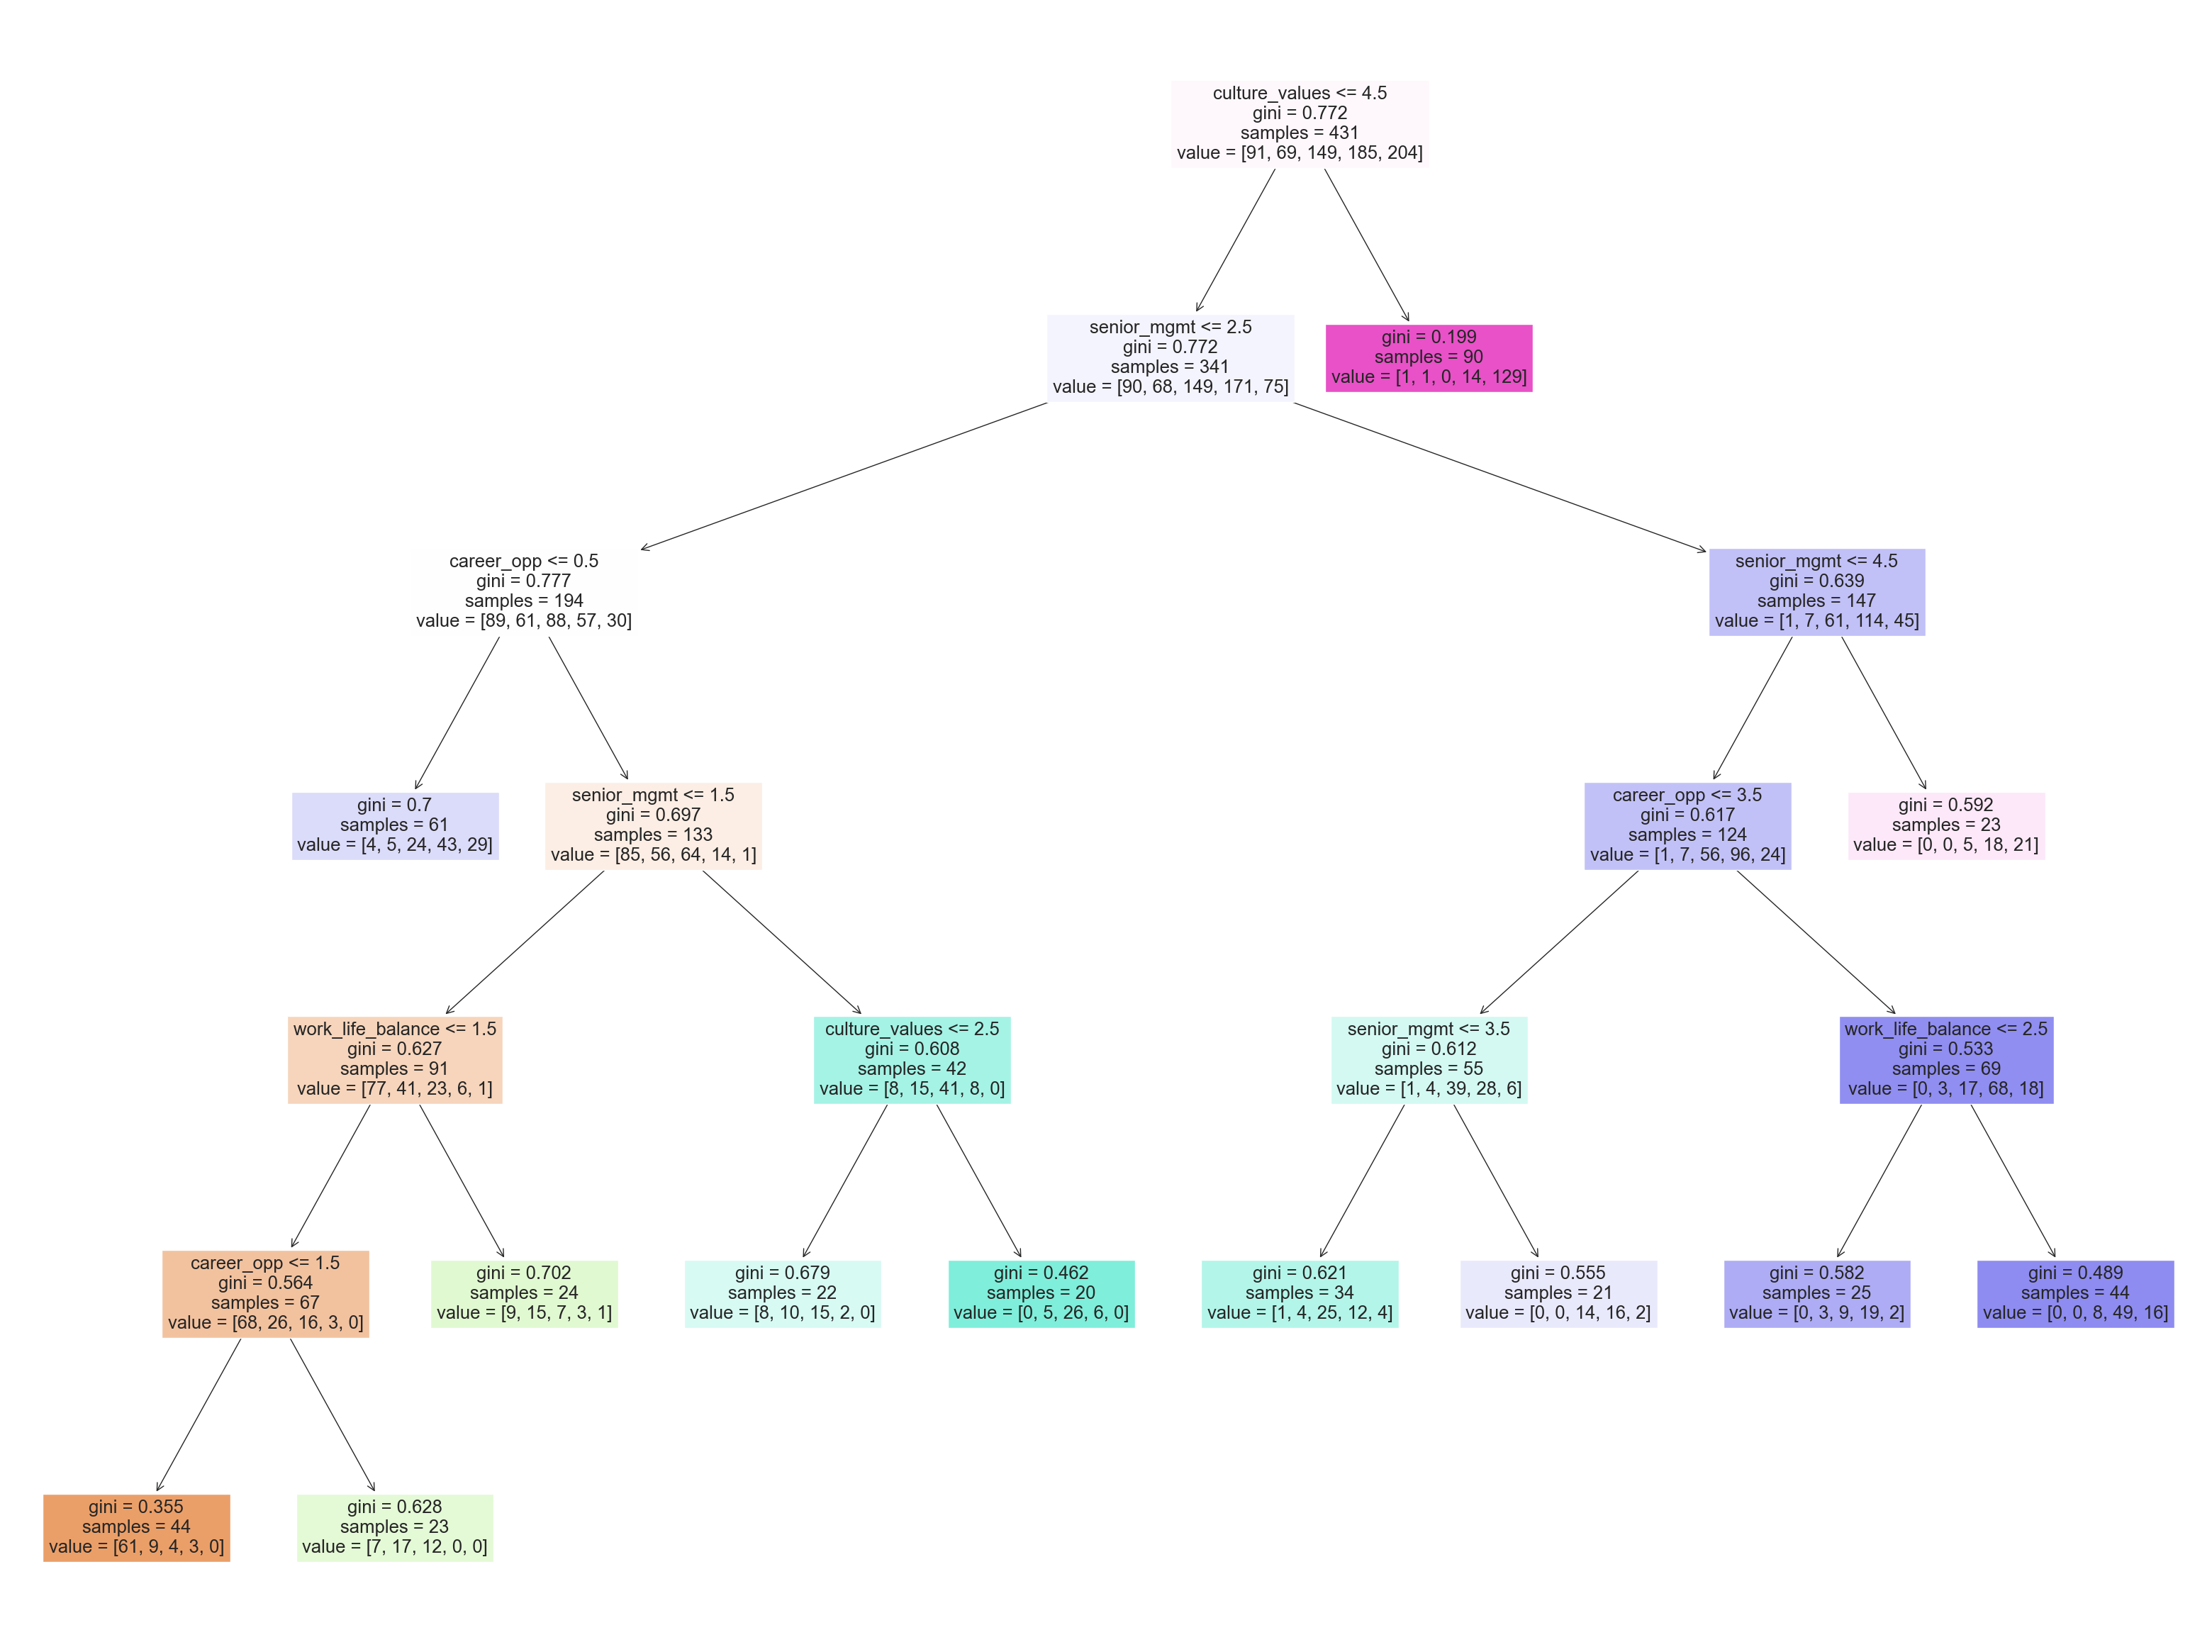

In [38]:
# plot one of the trees from random forest 
from sklearn.tree import plot_tree

randomized_best = random_search.best_estimator_

plt.figure(figsize=(40,30))

# tree created by estimators_[2], each tree is independent of each other
plot_tree(randomized_best.estimators_[2],feature_names = metrics_predict.columns
          ,filled=True);

In [86]:
# now let's sort the metrics based on importance 
randomized_best.feature_importances_

array([0.05730388, 0.41334956, 0.18804883, 0.06000707, 0.28129066])

In [87]:
imp_df = pd.DataFrame({
    "Metric": train_metrics_predict.columns,
    "Imp": randomized_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Metric,Imp
1,culture_values,0.413350
4,senior_mgmt,0.281291
2,career_opp,0.188049
3,comp_benefits,0.060007
0,work_life_balance,0.057304


## 5. Logistic Regression

In [103]:
# seperate dataframe for categorical data and overall_rating only
cat_rating = aldidata[['recommend', 'ceo_approv', 'outlook', 'overall_rating']]
cat_rating = cat_rating[~cat_rating.isin(['o']).any(axis=1)]
cat_rating2 = cat_rating.copy()

letter_to_num ={'v': 5, 'r': 2, 'x': 0}

cat_rating['recommend'] = cat_rating['recommend'].map(letter_to_num)
cat_rating['ceo_approv'] = cat_rating['ceo_approv'].map(letter_to_num)
cat_rating['outlook'] = cat_rating['outlook'].map(letter_to_num)

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.simplefilter("ignore")
lr = LogisticRegression()

cat_rating_response = pd.DataFrame(cat_rating[['overall_rating']])
cat_rating_predics = pd.DataFrame(cat_rating[['recommend', 'ceo_approv', 'outlook']])

# random split the dataset into test and train
train_cr_pred, test_cr_pred, train_cr_resp, test_cr_resp = train_test_split(cat_rating_predics, cat_rating_response,test_size = 0.25, random_state = 42)

# fit the logistic regression model with train dataset
lr.fit(train_cr_pred,train_cr_resp)

train_accuracy = lr.score(train_cr_pred,train_cr_resp)
print('Accuracy on the train set: {:.2f}'.format(train_accuracy))

resp_pred = lr.predict(test_cr_pred)
test_accuracy = accuracy_score(test_cr_resp,resp_pred)
print('Accuracy on the test set: {:.2f}'.format(test_accuracy))

Accuracy on the train set: 0.51
Accuracy on the test set: 0.44


In [92]:
from sklearn.feature_selection import RFE

# get the rank of importance of categorical predictors
selector = RFE(lr, n_features_to_select = 1)
selector = selector.fit(train_cr_pred,train_cr_resp.overall_rating.ravel())

x=1
for i in train_cr_pred.columns:
    print(x,":",i)
    x+=1

1 : recommend
2 : ceo_approv
3 : outlook


In [93]:
# calculate performance metrics to show accuracy, precision and recall
# precision: percent of correct prediction: TP/(TP+FP)
# recall: percert of positive cases caught: TP/(TP+FN)
# F1 score: percent of positive prediction that were correct: use to compare classifier models, not global accuracy

print(classification_report(test_cr_resp,resp_pred))

              precision    recall  f1-score   support

           1       0.65      0.67      0.66        30
           2       0.10      0.25      0.15        12
           3       0.47      0.27      0.35        33
           4       0.40      0.29      0.34        34
           5       0.53      0.60      0.56        35

    accuracy                           0.44       144
   macro avg       0.43      0.42      0.41       144
weighted avg       0.47      0.44      0.44       144



<module 'matplotlib.pyplot' from 'D:\\Users\\K\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

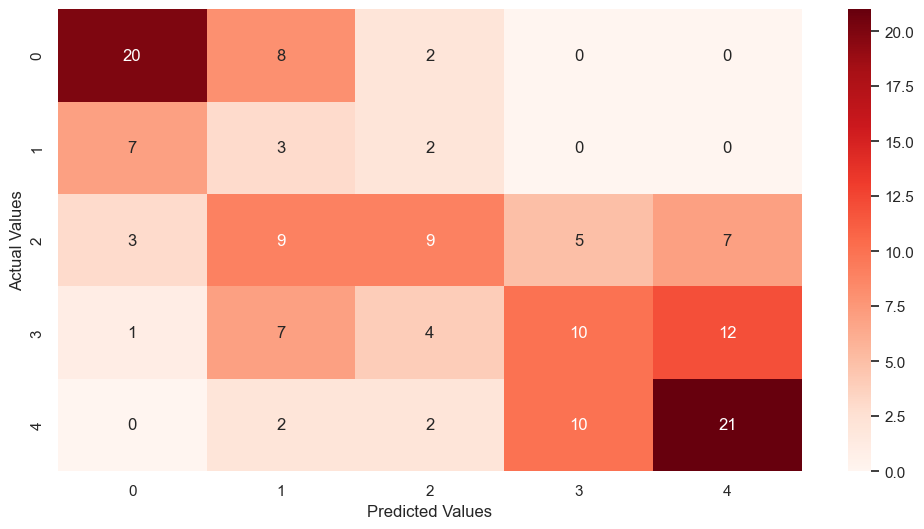

In [94]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_cr_resp,resp_pred)
plt.figure(figsize=(12,6))
sb.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt

### How do you read this?
-----
Similarly to a 2x2 confusion matrix: <br>
(read it similarly to chess) <br>
every value diagonally is a **True Negative** <br>
every value vertically aside from its value is a **False Positive** <br>
every value horizontally aside from its value is a **False Negative** <br>

In [104]:
# Let's try get_dummies to change it to an indicator variable
cat_rating2 = pd.get_dummies(cat_rating2, prefix = ['recommend', 'ceo_approv', 'outlook'], columns =['recommend', 'ceo_approv', 'outlook'])
cat_rating2

,overall_rating,recommend_v,recommend_x,ceo_approv_r,ceo_approv_v,ceo_approv_x,outlook_r,outlook_v,outlook_x
178,1,0,1,1,0,0,1,0,0
179,3,0,1,1,0,0,1,0,0
180,4,1,0,0,1,0,0,1,0
181,5,1,0,0,1,0,0,1,0
182,5,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1100,1,0,1,0,0,1,1,0,0
1102,1,0,1,0,0,1,1,0,0
1104,5,1,0,0,1,0,0,1,0
1105,5,1,0,0,1,0,0,1,0


In [105]:
lr = LogisticRegression()

cat_rating_response2 = pd.DataFrame(cat_rating2[['overall_rating']])
cat_rating_predics2 = pd.DataFrame(cat_rating2.drop(['overall_rating'], axis = 1))

# random split the dataset into test and train
train_cr_pred2, test_cr_pred2, train_cr_resp2, test_cr_resp2 = train_test_split(cat_rating_predics2, cat_rating_response2,test_size = 0.25, random_state = 42)

# fit the logistic regression model with train dataset
lr.fit(train_cr_pred2,train_cr_resp2)

train_accuracy = lr.score(train_cr_pred2,train_cr_resp2)
print('Accuracy on the train set: {:.2f}'.format(train_accuracy))

resp_pred2 = lr.predict(test_cr_pred2)
test_accuracy = accuracy_score(test_cr_resp2,resp_pred2)
print('Accuracy on the test set: {:.2f}'.format(test_accuracy))

Accuracy on the train set: 0.51
Accuracy on the test set: 0.42


In [106]:
# get the rank of importance of categorical predictors
selector = RFE(lr, n_features_to_select = 1)
selector = selector.fit(train_cr_pred2,train_cr_resp2.overall_rating.ravel())

x=1
for i in train_cr_pred2.columns:
    print(x,":",i)
    x+=1

1 : recommend_v
2 : recommend_x
3 : ceo_approv_r
4 : ceo_approv_v
5 : ceo_approv_x
6 : outlook_r
7 : outlook_v
8 : outlook_x


<module 'matplotlib.pyplot' from 'D:\\Users\\K\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

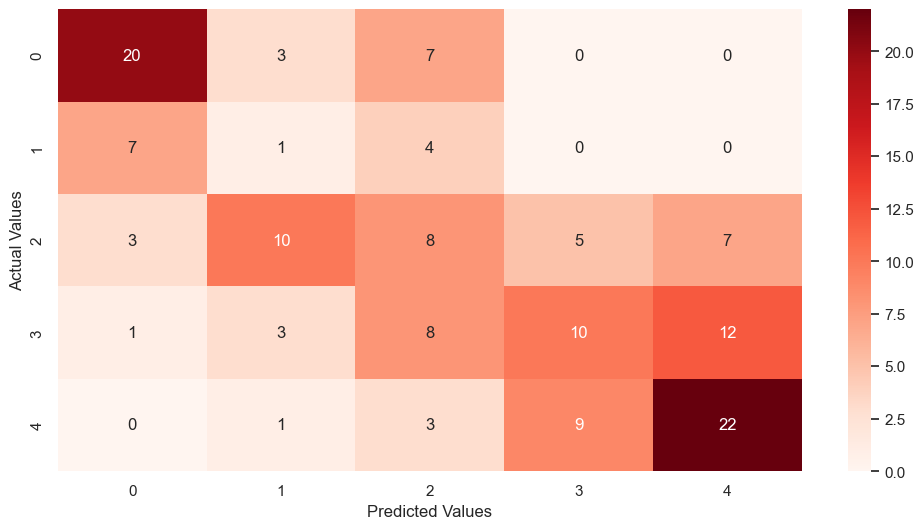

In [107]:
cm = confusion_matrix(test_cr_resp2,resp_pred2)
plt.figure(figsize=(12,6))
sb.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt

#### However, this shows that the machine learning <u>does not work as well</u> on this categorical variables:
> Factor 1: Glassdoor separating it using symbols that are not detailed, lead to results that are less than ideal to predict. <br>
> Factor 2: The low accuracy on train and test set has shown that the variables itself are limited, and not the fault of the
> machine being trained.

-----------

## 6. Findings and Conclusions

### <u>Findings</u>

**From visualisation and Exploratory Data Analysis:** <br>
- Work-life-balance is very low in ALDI, perhaps by survivorship bias, ALDI should focus more on employee work-life-balance bettter. <br>
<br>

**From Linear Regression:** <br>
- Company benefits has the lowest linear correlation value with overall ratings to the company. Employees care least about benefits when they are working with ALDI. <br>
<br>
- Both culture values and senior management has the highest linear correlation value with ratings. With their strong correlation with each other, perhaps ALDI should focus on both of them to have higher rating, and possibly higher employee retention<br>
<br>
- For categorical variables, recommendation has the highest linear correlation value, while ceo approval has the lowest linear correlation value. This makes sense as you are more likely to recommend people to work here if you are already rate the workplace highly <br>
<br>

**From Machine Learning:**
- Random Forest is very effective in modelling multiple numerical variables. It gave a respectable classification accuracy of 0.6. It supports our conclusion of linear regression, by showing that culture values is the most important in predicting overall rating. <br>
<br>
- Logistic Regression is a powerful tool to model an outcome with categorical variables. Perhaps, it is the way we are not modelling a binomial outcome, which harshly reduces the accuracy on training. However, it still supports the stand that recommend is the best at predicting overall rating <br>


### <u>Conclusion</u>

**Answering our problem:**
- 1. ALDI should maintain strong culture values and capable senior management together to continually improve ratings while possibly improving employee retention. Moreover, they should look to improve employee's work-life-balance. <br>
- 2. Company benefits increased over the years, whereas every other metric remained average and stagnant. ALDI employees has poor work-life-balance. <br>
<br>

### <u>Final note:</u>

- More can be done with both numerical and categorical variables. However, with the limitations of Glassdoor only implementing integers as numerical results and a limited metrics for categories, the results are slightly skewed and inaccurate. Implementing the machine learning shown less than ideal results, but results aligned with what is expected.